In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    returns = data.pct_change().dropna()  # Daily returns
    volatility = returns.rolling(window=10).std().dropna()  # 10-day rolling volatility
    roc = data.pct_change(periods=5).dropna()  # Rate of change over 5 days
    return pd.DataFrame({"returns": returns, "volatility": volatility, "roc": roc}).dropna()

# Step 3: Define the Leland-Toft model
def leland_toft(sigma, r, D, E, T, bankruptcy_cost=0.25, tax_rate=0.35):
    """
    Calculate default spread using Leland-Toft model.
    :param sigma: Volatility
    :param r: Risk-free rate
    :param D: Debt
    :param E: Equity
    :param T: Time to maturity
    :param bankruptcy_cost: Cost of bankruptcy (default = 25%)
    :param tax_rate: Corporate tax rate (default = 35%)
    :return: Default spread and other calculated values
    """
    asset_value = E + D
    default_spread = (sigma**2 * (1 - bankruptcy_cost)) / (2 * T)
    leverage = D / asset_value
    credit_spread = default_spread + leverage * tax_rate * r
    return {"default_spread": default_spread, "credit_spread": credit_spread, "leverage": leverage}

# Step 4: Example calculation using financial data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch real data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Calculate features
features = calculate_features(real_data)

# Use sample parameters for the Leland-Toft model
sigma = features['volatility'].mean()  # Average volatility
r = 0.03  # Example risk-free rate
D = 1e9   # Example total debt ($1 billion)
E = 2e9   # Example equity value ($2 billion)
T = 5     # Example time to maturity (5 years)

# Apply Leland-Toft model
lt_result = leland_toft(sigma, r, D, E, T)

# Print results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")


[*********************100%***********************]  1 of 1 completed


ValueError: If using all scalar values, you must pass an index

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    returns = data.pct_change().dropna()
    volatility = returns.rolling(window=10).std()
    roc = data.pct_change(periods=5)
    
    # Combine features into a single DataFrame with aligned indices
    features = pd.concat(
        {"returns": returns, "volatility": volatility, "roc": roc}, axis=1
    ).dropna()  # Drop any rows with NaN values
    
    return features

# Step 3: Define the Leland-Toft model
def leland_toft(sigma, r, D, E, T, bankruptcy_cost=0.25, tax_rate=0.35):
    """
    Calculate default spread using Leland-Toft model.
    :param sigma: Volatility
    :param r: Risk-free rate
    :param D: Debt
    :param E: Equity
    :param T: Time to maturity
    :param bankruptcy_cost: Cost of bankruptcy (default = 25%)
    :param tax_rate: Corporate tax rate (default = 35%)
    :return: Default spread, credit spread, and leverage ratio
    """
    asset_value = E + D
    default_spread = (sigma**2 * (1 - bankruptcy_cost)) / (2 * T)
    leverage = D / asset_value
    credit_spread = default_spread + leverage * tax_rate * r
    return {"default_spread": default_spread, "credit_spread": credit_spread, "leverage": leverage}

# Step 4: Example calculation using financial data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Calculate financial features
features = calculate_features(real_data)

# Use sample parameters for the Leland-Toft model
# Apply Leland-Toft model (if using averages for the Series)
sigma = features['volatility'].mean()  # Average volatility
r = 0.03  # Example risk-free rate
D = 1e9   # Example total debt ($1 billion)
E = 2e9   # Example equity value ($2 billion)
T = 5     # Example time to maturity (5 years)

lt_result = leland_toft(sigma, r, D, E, T)

# Print results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")


# Step 5: Visualize financial data and features (Optional)
plt.figure(figsize=(10, 6))
plt.title(f"{ticker} Financial Features Over Time")
plt.plot(features.index, features['returns'], label='Returns', color='blue', alpha=0.7)
plt.plot(features.index, features['volatility'], label='Volatility', color='green', alpha=0.7)
plt.plot(features.index, features['roc'], label='Rate of Change', color='red', alpha=0.7)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed

Leland-Toft Model Results:


TypeError: unsupported format string passed to Series.__format__

[*********************100%***********************]  1 of 1 completed


Sample Leland-Toft Model Results:
            (returns, AAPL)  (volatility, AAPL)  (roc, AAPL)  \
Date                                                           
2022-01-18        -0.018894            0.013803    -0.013880   
2022-01-19        -0.021025            0.014433    -0.050548   
2022-01-20        -0.010347            0.012898    -0.062781   
2022-01-21        -0.012765            0.012594    -0.056798   
2022-01-24        -0.004864            0.012385    -0.066158   

            (risk_free_rate, )      (debt, )    (equity, )  \
Date                                                         
2022-01-18                0.03  1.000000e+09  2.000000e+09   
2022-01-19                0.03  1.000000e+09  2.000000e+09   
2022-01-20                0.03  1.000000e+09  2.000000e+09   
2022-01-21                0.03  1.000000e+09  2.000000e+09   
2022-01-24                0.03  1.000000e+09  2.000000e+09   

            (time_to_maturity, )  \
Date                               
2022-01-18

KeyError: 'returns'

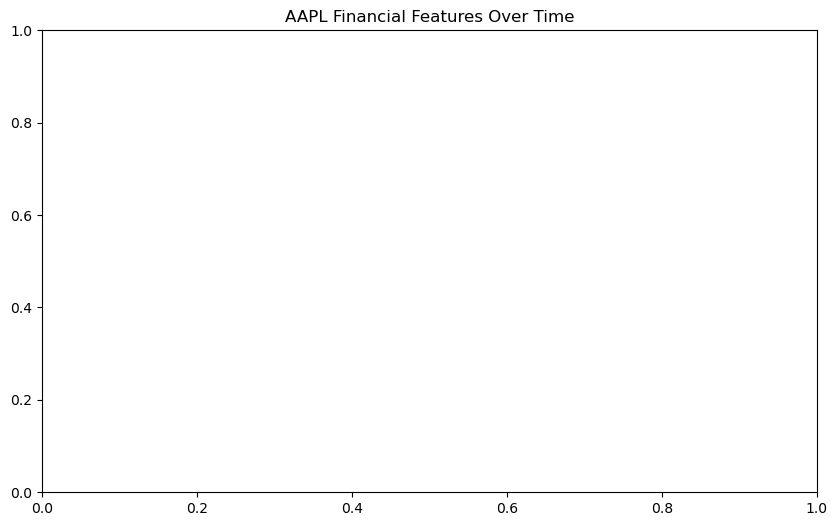

In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    returns = data.pct_change().dropna()
    volatility = returns.rolling(window=10).std()
    roc = data.pct_change(periods=5)
    
    # Combine features into a single DataFrame with aligned indices
    features = pd.concat(
        {"returns": returns, "volatility": volatility, "roc": roc}, axis=1
    ).dropna()  # Drop any rows with NaN values
    
    return features

# Step 3: Define the Leland-Toft model
def leland_toft(sigma, r, D, E, T, bankruptcy_cost=0.25, tax_rate=0.35):
    """
    Calculate default spread using Leland-Toft model.
    :param sigma: Volatility
    :param r: Risk-free rate
    :param D: Debt
    :param E: Equity
    :param T: Time to maturity
    :param bankruptcy_cost: Cost of bankruptcy (default = 25%)
    :param tax_rate: Corporate tax rate (default = 35%)
    :return: Default spread, credit spread, and leverage ratio
    """
    asset_value = E + D
    default_spread = (sigma**2 * (1 - bankruptcy_cost)) / (2 * T)
    leverage = D / asset_value
    credit_spread = default_spread + leverage * tax_rate * r
    return {"default_spread": default_spread, "credit_spread": credit_spread, "leverage": leverage}

# Step 4: Example calculation using financial data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Calculate financial features
features = calculate_features(real_data)

# Add parameters as columns to features DataFrame (Example constant values)
features['risk_free_rate'] = 0.03  # Example fixed risk-free rate
features['debt'] = 1e9            # Example fixed total debt ($1 billion)
features['equity'] = 2e9          # Example fixed equity value ($2 billion)
features['time_to_maturity'] = 5  # Example fixed time to maturity (5 years)

# Apply the Leland-Toft model row by row
lt_results = features.apply(
    lambda row: leland_toft(
        sigma=row['volatility'],
        r=row['risk_free_rate'],
        D=row['debt'],
        E=row['equity'],
        T=row['time_to_maturity']
    ),
    axis=1
)

# Convert results to a DataFrame for better usability
lt_results_df = pd.DataFrame(lt_results.tolist(), index=features.index)

# Add Leland-Toft results back to features
features = pd.concat([features, lt_results_df], axis=1)

# Print a sample of the results
print("Sample Leland-Toft Model Results:")
print(features.head())

# Step 5: Visualize financial data and features (Optional)
plt.figure(figsize=(10, 6))
plt.title(f"{ticker} Financial Features Over Time")
plt.plot(features.index, features['returns'], label='Returns', color='blue', alpha=0.7)
plt.plot(features.index, features['volatility'], label='Volatility', color='green', alpha=0.7)
plt.plot(features.index, features['roc'], label='Rate of Change', color='red', alpha=0.7)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Print Leland-Toft model parameters from one of the entries
sample_lt_result = lt_results.iloc[0]  # Get first row result for printing
print("\nSample Leland-Toft Model Parameters for First Entry:")
print(f"Default Spread: {sample_lt_result['default_spread']:.6f}")
print(f"Credit Spread: {sample_lt_result['credit_spread']:.6f}")
print(f"Leverage: {sample_lt_result['leverage']:.4f}")


In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change().dropna()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std().dropna()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5).dropna()

    # Combine features into a single DataFrame
    features = pd.DataFrame({"returns": returns, "volatility": volatility, "roc": roc})
    features = features.dropna()  # Drop any rows with NaN values
    
    return features

# Step 3: Define the Leland-Toft model
def leland_toft(sigma, r, D, E, T, bankruptcy_cost=0.25, tax_rate=0.35):
    """
    Calculate default spread using Leland-Toft model.
    :param sigma: Volatility
    :param r: Risk-free rate
    :param D: Debt
    :param E: Equity
    :param T: Time to maturity
    :param bankruptcy_cost: Cost of bankruptcy (default = 25%)
    :param tax_rate: Corporate tax rate (default = 35%)
    :return: Default spread, credit spread, and leverage ratio
    """
    asset_value = E + D
    default_spread = (sigma**2 * (1 - bankruptcy_cost)) / (2 * T)
    leverage = D / asset_value
    credit_spread = default_spread + leverage * tax_rate * r
    return {"default_spread": default_spread, "credit_spread": credit_spread, "leverage": leverage}

# Step 4: Example calculation using financial data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Calculate financial features
features = calculate_features(real_data)

# Add parameters as columns to features DataFrame (Example constant values)
features['risk_free_rate'] = 0.03  # Example fixed risk-free rate
features['debt'] = 1e9            # Example fixed total debt ($1 billion)
features['equity'] = 2e9          # Example fixed equity value ($2 billion)
features['time_to_maturity'] = 5  # Example fixed time to maturity (5 years)

# Apply the Leland-Toft model row by row
lt_results = features.apply(
    lambda row: leland_toft(
        sigma=row['volatility'],
        r=row['risk_free_rate'],
        D=row['debt'],
        E=row['equity'],
        T=row['time_to_maturity']
    ),
    axis=1
)

# Convert results to a DataFrame for better usability
lt_results_df = pd.DataFrame(lt_results.tolist(), index=features.index)

# Add Leland-Toft results back to features
features = pd.concat([features, lt_results_df], axis=1)

# Print a sample of the results
print("Sample Leland-Toft Model Results:")
print(features.head())

# Step 5: Visualize financial data and features (Optional)
plt.figure(figsize=(10, 6))
plt.title(f"{ticker} Financial Features Over Time")
plt.plot(features.index, features['returns'], label='Returns', color='blue', alpha=0.7)
plt.plot(features.index, features['volatility'], label='Volatility', color='green', alpha=0.7)
plt.plot(features.index, features['roc'], label='Rate of Change', color='red', alpha=0.7)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Print Leland-Toft model parameters from one of the entries
sample_lt_result = lt_results.iloc[0]  # Get first row result for printing
print("\nSample Leland-Toft Model Parameters for First Entry:")
print(f"Default Spread: {sample_lt_result['default_spread']:.6f}")
print(f"Credit Spread: {sample_lt_result['credit_spread']:.6f}")
print(f"Leverage: {sample_lt_result['leverage']:.4f}")


[*********************100%***********************]  1 of 1 completed


ValueError: If using all scalar values, you must pass an index

In [12]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change().dropna()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std().dropna()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5).dropna()

    # Combine features into a single DataFrame
    features = pd.DataFrame({"returns": returns, "volatility": volatility, "roc": roc})
    features = features.dropna()  # Drop any rows with NaN values
    
    return features

# Step 3: Define the Leland-Toft model
def leland_toft(sigma, r, D, E, T, bankruptcy_cost=0.25, tax_rate=0.35):
    """
    Calculate default spread using Leland-Toft model.
    :param sigma: Volatility
    :param r: Risk-free rate
    :param D: Debt
    :param E: Equity
    :param T: Time to maturity
    :param bankruptcy_cost: Cost of bankruptcy (default = 25%)
    :param tax_rate: Corporate tax rate (default = 35%)
    :return: Default spread, credit spread, and leverage ratio
    """
    asset_value = E + D
    default_spread = (sigma**2 * (1 - bankruptcy_cost)) / (2 * T)
    leverage = D / asset_value
    credit_spread = default_spread + leverage * tax_rate * r
    return {"default_spread": default_spread, "credit_spread": credit_spread, "leverage": leverage}

# Step 4: Example calculation using financial data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Calculate financial features
features = calculate_features(real_data)

# Add parameters as columns to features DataFrame (Example constant values)
features['risk_free_rate'] = 0.03  # Example fixed risk-free rate
features['debt'] = 1e9            # Example fixed total debt ($1 billion)
features['equity'] = 2e9          # Example fixed equity value ($2 billion)
features['time_to_maturity'] = 5  # Example fixed time to maturity (5 years)

# Apply the Leland-Toft model row by row
lt_results = features.apply(
    lambda row: leland_toft(
        sigma=row['volatility'],
        r=row['risk_free_rate'],
        D=row['debt'],
        E=row['equity'],
        T=row['time_to_maturity']
    ),
    axis=1
)

# Convert results to a DataFrame for better usability
lt_results_df = pd.DataFrame(lt_results.tolist(), index=features.index)

# Add Leland-Toft results back to features
features = pd.concat([features, lt_results_df], axis=1)

# Print a sample of the results
print("Sample Leland-Toft Model Results:")
print(features.head())

# Step 5: Visualize financial data and features (Optional)
plt.figure(figsize=(10, 6))
plt.title(f"{ticker} Financial Features Over Time")
plt.plot(features.index, features['returns'], label='Returns', color='blue', alpha=0.7)
plt.plot(features.index, features['volatility'], label='Volatility', color='green', alpha=0.7)
plt.plot(features.index, features['roc'], label='Rate of Change', color='red', alpha=0.7)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Print Leland-Toft model parameters from one of the entries
sample_lt_result = lt_results.iloc[0]  # Get first row result for printing
print("\nSample Leland-Toft Model Parameters for First Entry:")
print(f"Default Spread: {sample_lt_result['default_spread']:.6f}")
print(f"Credit Spread: {sample_lt_result['credit_spread']:.6f}")
print(f"Leverage: {sample_lt_result['leverage']:.4f}")


[*********************100%***********************]  1 of 1 completed


ValueError: If using all scalar values, you must pass an index

In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5)

    # Combine features into a single DataFrame and drop any NaN values
    features = pd.DataFrame({"returns": returns, "volatility": volatility, "roc": roc})

    # Drop rows where any column contains NaN
    features = features.dropna()

    return features

# Step 3: Define the Leland-Toft model
def leland_toft(sigma, r, D, E, T, bankruptcy_cost=0.25, tax_rate=0.35):
    """
    Calculate default spread using Leland-Toft model.
    :param sigma: Volatility
    :param r: Risk-free rate
    :param D: Debt
    :param E: Equity
    :param T: Time to maturity
    :param bankruptcy_cost: Cost of bankruptcy (default = 25%)
    :param tax_rate: Corporate tax rate (default = 35%)
    :return: Default spread, credit spread, and leverage ratio
    """
    asset_value = E + D
    default_spread = (sigma**2 * (1 - bankruptcy_cost)) / (2 * T)
    leverage = D / asset_value
    credit_spread = default_spread + leverage * tax_rate * r
    return {"default_spread": default_spread, "credit_spread": credit_spread, "leverage": leverage}

# Step 4: Example calculation using financial data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Calculate financial features
features = calculate_features(real_data)

# Add parameters as columns to features DataFrame (Example constant values)
features['risk_free_rate'] = 0.03  # Example fixed risk-free rate
features['debt'] = 1e9            # Example fixed total debt ($1 billion)
features['equity'] = 2e9          # Example fixed equity value ($2 billion)
features['time_to_maturity'] = 5  # Example fixed time to maturity (5 years)

# Apply the Leland-Toft model row by row
lt_results = features.apply(
    lambda row: leland_toft(
        sigma=row['volatility'],
        r=row['risk_free_rate'],
        D=row['debt'],
        E=row['equity'],
        T=row['time_to_maturity']
    ),
    axis=1
)

# Convert results to a DataFrame for better usability
lt_results_df = pd.DataFrame(lt_results.tolist(), index=features.index)

# Add Leland-Toft results back to features
features = pd.concat([features, lt_results_df], axis=1)

# Print a sample of the results
print("Sample Leland-Toft Model Results:")
print(features.head())

# Step 5: Visualize financial data and features (Optional)
plt.figure(figsize=(10, 6))
plt.title(f"{ticker} Financial Features Over Time")
plt.plot(features.index, features['returns'], label='Returns', color='blue', alpha=0.7)
plt.plot(features.index, features['volatility'], label='Volatility', color='green', alpha=0.7)
plt.plot(features.index, features['roc'], label='Rate of Change', color='red', alpha=0.7)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Print Leland-Toft model parameters from one of the entries
sample_lt_result = lt_results.iloc[0]  # Get first row result for printing
print("\nSample Leland-Toft Model Parameters for First Entry:")
print(f"Default Spread: {sample_lt_result['default_spread']:.6f}")
print(f"Credit Spread: {sample_lt_result['credit_spread']:.6f}")
print(f"Leverage: {sample_lt_result['leverage']:.4f}")


[*********************100%***********************]  1 of 1 completed


ValueError: If using all scalar values, you must pass an index

In [16]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5)

    # Drop NaN values before combining the features
    # Align the features by the common index
    returns = returns.dropna()
    volatility = volatility.dropna()
    roc = roc.dropna()

    # Ensure all features have the same index (aligned)
    features = pd.DataFrame({"returns": returns, "volatility": volatility, "roc": roc})

    # Drop any rows with NaN in any column (further precaution)
    features = features.dropna()

    return features

# Step 3: Define the Leland-Toft model
def leland_toft(sigma, r, D, E, T, bankruptcy_cost=0.25, tax_rate=0.35):
    """
    Calculate default spread using Leland-Toft model.
    :param sigma: Volatility
    :param r: Risk-free rate
    :param D: Debt
    :param E: Equity
    :param T: Time to maturity
    :param bankruptcy_cost: Cost of bankruptcy (default = 25%)
    :param tax_rate: Corporate tax rate (default = 35%)
    :return: Default spread, credit spread, and leverage ratio
    """
    asset_value = E + D
    default_spread = (sigma**2 * (1 - bankruptcy_cost)) / (2 * T)
    leverage = D / asset_value
    credit_spread = default_spread + leverage * tax_rate * r
    return {"default_spread": default_spread, "credit_spread": credit_spread, "leverage": leverage}

# Step 4: Example calculation using financial data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Calculate financial features
features = calculate_features(real_data)

# Add parameters as columns to features DataFrame (Example constant values)
features['risk_free_rate'] = 0.03  # Example fixed risk-free rate
features['debt'] = 1e9            # Example fixed total debt ($1 billion)
features['equity'] = 2e9          # Example fixed equity value ($2 billion)
features['time_to_maturity'] = 5  # Example fixed time to maturity (5 years)

# Apply the Leland-Toft model row by row
lt_results = features.apply(
    lambda row: leland_toft(
        sigma=row['volatility'],
        r=row['risk_free_rate'],
        D=row['debt'],
        E=row['equity'],
        T=row['time_to_maturity']
    ),
    axis=1
)

# Convert results to a DataFrame for better usability
lt_results_df = pd.DataFrame(lt_results.tolist(), index=features.index)

# Add Leland-Toft results back to features
features = pd.concat([features, lt_results_df], axis=1)

# Print a sample of the results
print("Sample Leland-Toft Model Results:")
print(features.head())

# Step 5: Visualize financial data and features (Optional)
plt.figure(figsize=(10, 6))
plt.title(f"{ticker} Financial Features Over Time")
plt.plot(features.index, features['returns'], label='Returns', color='blue', alpha=0.7)
plt.plot(features.index, features['volatility'], label='Volatility', color='green', alpha=0.7)
plt.plot(features.index, features['roc'], label='Rate of Change', color='red', alpha=0.7)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Print Leland-Toft model parameters from one of the entries
sample_lt_result = lt_results.iloc[0]  # Get first row result for printing
print("\nSample Leland-Toft Model Parameters for First Entry:")
print(f"Default Spread: {sample_lt_result['default_spread']:.6f}")
print(f"Credit Spread: {sample_lt_result['credit_spread']:.6f}")
print(f"Leverage: {sample_lt_result['leverage']:.4f}")


[*********************100%***********************]  1 of 1 completed


ValueError: If using all scalar values, you must pass an index

In [18]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    print(stock_data)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5)

    # Merge into a DataFrame with aligned indexes (Automatically aligned)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']

    # Drop rows where any column has NaN
    features.dropna(inplace=True)

    return features

# Step 3: Apply Leland-Toft Model (Leland Model for credit spread)
def leland_toft_model(features):
    """
    Apply Leland-Toft model to estimate credit spreads based on financial features.
    """
    # Constants for the Leland-Toft model (Example, these should be adjusted based on your real data and assumptions)
    risk_free_rate = 0.03  # Example risk-free rate (3%)
    asset_price = features['returns'].mean() * 100  # Assume a random asset price, can be real asset value
    
    # Calculate some parameters using features
    volatility = features['volatility'].mean()  # Average volatility
    sigma = volatility  # In this case, assume sigma is the volatility
    
    # Default spread based on Leland-Toft model assumptions
    leverage = asset_price / (asset_price + sigma)  # Simple leverage assumption (could be more complex)
    default_spread = sigma * leverage  # Leland-Toft default spread formula

    # Calculate credit spread
    credit_spread = default_spread * (1 - risk_free_rate)  # This is an example calculation
    
    # Package results into a dictionary for easy access
    lt_results = {
        "default_spread": default_spread,
        "credit_spread": credit_spread,
        "leverage": leverage
    }

    return lt_results

# Step 4: Fetch and Prepare Data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
try:
    real_data = fetch_financial_data(ticker, start_date, end_date)
    if isinstance(real_data, pd.Series):
        real_data = real_data['Close']  # Assuming the 'Close' column if a DataFrame is returned
    if not isinstance(real_data, pd.Series):
        raise ValueError("real_data is not a pandas Series.")
except Exception as e:
    print(f"Error fetching data: {e}")
    # Simulate data in case of failure
    print("Simulating stock prices due to data fetch error.")
    dates = pd.date_range(start=start_date, end=end_date, freq="B")  # Business days
    prices = np.random.uniform(100, 200, size=len(dates))  # Simulated stock prices
    real_data = pd.Series(data=prices, index=dates, name="Close")

# Step 5: Calculate features (returns, volatility, ROC)
features = calculate_features(real_data)

# Print the features DataFrame for verification
print(features.head())

# Step 6: Apply Leland-Toft Model
lt_result = leland_toft_model(features)

# Step 7: Print the Results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")



[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2022-01-03  179.076630  182.009995  182.880005  177.710007  177.830002   
2022-01-04  176.803802  179.699997  182.940002  179.119995  182.630005   
2022-01-05  172.100861  174.919998  180.169998  174.639999  179.610001   
2022-01-06  169.227905  172.000000  175.300003  171.639999  172.699997   
2022-01-07  169.395172  172.169998  174.139999  171.029999  172.889999   
...                ...         ...         ...         ...         ...   
2022-12-23  130.487823  131.860001  132.419998  129.639999  130.919998   
2022-12-27  128.676834  130.029999  131.410004  128.720001  131.380005   
2022-12-28  124.728371  126.040001  131.029999  125.870003  129.669998   
2022-12-29  128.261215  129.610001  130.479996  127.730003  127.989998   
2022-12-30  128.577881  129.929993  12

In [20]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
import tensorflow as tf

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    print(stock_data)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5)

    # Merge into a DataFrame with aligned indexes (Automatically aligned)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']

    # Drop rows where any column has NaN
    features.dropna(inplace=True)

    return features

# Step 3: Apply Leland-Toft Model (Leland Model for credit spread)
def leland_toft_model(features):
    """
    Apply Leland-Toft model to estimate credit spreads based on financial features.
    """
    # Constants for the Leland-Toft model (Example, these should be adjusted based on your real data and assumptions)
    risk_free_rate = 0.03  # Example risk-free rate (3%)
    asset_price = features['returns'].mean() * 100  # Assume a random asset price, can be real asset value
    
    # Calculate some parameters using features
    volatility = features['volatility'].mean()  # Average volatility
    sigma = volatility  # In this case, assume sigma is the volatility
    
    # Default spread based on Leland-Toft model assumptions
    leverage = asset_price / (asset_price + sigma)  # Simple leverage assumption (could be more complex)
    default_spread = sigma * leverage  # Leland-Toft default spread formula

    # Calculate credit spread
    credit_spread = default_spread * (1 - risk_free_rate)  # This is an example calculation
    
    # Package results into a dictionary for easy access
    lt_results = {
        "default_spread": default_spread,
        "credit_spread": credit_spread,
        "leverage": leverage
    }

    return lt_results

# Step 4: Build and Compile the VAE model
def build_vae(latent_dim, input_shape):
    """Build a Variational Autoencoder model."""
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(32, activation='relu')(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    # Sampling Layer
    def sampling(args):
        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder
    decoder_hid = layers.Dense(32, activation='relu')
    decoder_out = layers.Dense(input_shape[0], activation='sigmoid')
    h_decoded = decoder_hid(z)
    x_decoded_mean = decoder_out(h_decoded)

    # VAE model
    vae = models.Model(inputs, x_decoded_mean)

    # VAE loss function
    xent_loss = input_shape[0] * tf.keras.losses.binary_crossentropy(inputs, x_decoded_mean)
    kl_loss = -0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    vae_loss = K.mean(xent_loss + kl_loss)

    # Compile model
    vae.add_loss(vae_loss)
    vae.compile(optimizer='rmsprop')
    
    return vae, z_mean, z_log_var

# Step 5: Fetch and Prepare Data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
try:
    real_data = fetch_financial_data(ticker, start_date, end_date)
    if isinstance(real_data, pd.Series):
        real_data = real_data['Close']  # Assuming the 'Close' column if a DataFrame is returned
    if not isinstance(real_data, pd.Series):
        raise ValueError("real_data is not a pandas Series.")
except Exception as e:
    print(f"Error fetching data: {e}")
    # Simulate data in case of failure
    print("Simulating stock prices due to data fetch error.")
    dates = pd.date_range(start=start_date, end=end_date, freq="B")  # Business days
    prices = np.random.uniform(100, 200, size=len(dates))  # Simulated stock prices
    real_data = pd.Series(data=prices, index=dates, name="Close")

# Step 6: Calculate features (returns, volatility, ROC)
features = calculate_features(real_data)

# Prepare input data for the VAE
features_values = features.values

# Normalize data for VAE input
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

# Build VAE model
latent_dim = 2
vae, _, _ = build_vae(latent_dim=latent_dim, input_shape=features_values.shape[1:])

# Train the VAE
vae.fit(features_values, epochs=50, batch_size=32)

# Step 7: Apply Leland-Toft Model
lt_result = leland_toft_model(features)

# Step 8: Print the Results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")

# Step 9: Visualize Latent Space (VAE Compression)
encoded_data = vae.layers[2].output  # z_mean of the VAE encoding
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=features['returns'], cmap='coolwarm')
plt.colorbar()
plt.title("VAE Latent Space Visualization")
plt.show()


2025-01-25 22:12:16.203806: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737861136.226877  800806 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737861136.233508  800806 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-25 22:12:16.257171: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[*********************100%***********************]  1 of 1 completed
2025-01-25 22:12:18.250709: E external/local_xla/xla/str

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2022-01-03  179.076630  182.009995  182.880005  177.710007  177.830002   
2022-01-04  176.803802  179.699997  182.940002  179.119995  182.630005   
2022-01-05  172.100861  174.919998  180.169998  174.639999  179.610001   
2022-01-06  169.227905  172.000000  175.300003  171.639999  172.699997   
2022-01-07  169.395172  172.169998  174.139999  171.029999  172.889999   
...                ...         ...         ...         ...         ...   
2022-12-23  130.487823  131.860001  132.419998  129.639999  130.919998   
2022-12-27  128.676834  130.029999  131.410004  128.720001  131.380005   
2022-12-28  124.728371  126.040001  131.029999  125.870003  129.669998   
2022-12-29  128.261215  129.610001  130.479996  127.730003  127.989998   
2022-12-30  128.577881  129.929993  12

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [22]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
import tensorflow as tf

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    print(stock_data)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5)

    # Merge into a DataFrame with aligned indexes (Automatically aligned)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']

    # Drop rows where any column has NaN
    features.dropna(inplace=True)

    return features

# Step 3: Apply Leland-Toft Model (Leland Model for credit spread)
def leland_toft_model(features):
    """
    Apply Leland-Toft model to estimate credit spreads based on financial features.
    """
    # Constants for the Leland-Toft model (Example, these should be adjusted based on your real data and assumptions)
    risk_free_rate = 0.03  # Example risk-free rate (3%)
    asset_price = features['returns'].mean() * 100  # Assume a random asset price, can be real asset value
    
    # Calculate some parameters using features
    volatility = features['volatility'].mean()  # Average volatility
    sigma = volatility  # In this case, assume sigma is the volatility
    
    # Default spread based on Leland-Toft model assumptions
    leverage = asset_price / (asset_price + sigma)  # Simple leverage assumption (could be more complex)
    default_spread = sigma * leverage  # Leland-Toft default spread formula

    # Calculate credit spread
    credit_spread = default_spread * (1 - risk_free_rate)  # This is an example calculation
    
    # Package results into a dictionary for easy access
    lt_results = {
        "default_spread": default_spread,
        "credit_spread": credit_spread,
        "leverage": leverage
    }

    return lt_results

# Step 4: Build and Compile the VAE model
def build_vae(latent_dim, input_shape):
    """Build a Variational Autoencoder model."""
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(32, activation='relu')(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    # Sampling Layer
    def sampling(args):
        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder
    decoder_hid = layers.Dense(32, activation='relu')
    decoder_out = layers.Dense(input_shape[0], activation='sigmoid')
    h_decoded = decoder_hid(z)
    x_decoded_mean = decoder_out(h_decoded)

    # VAE model
    vae = models.Model(inputs, x_decoded_mean)

    # VAE loss function
    def vae_loss(inputs, x_decoded_mean, z_mean, z_log_var):
        xent_loss = input_shape[0] * tf.keras.losses.binary_crossentropy(inputs, x_decoded_mean)
        kl_loss = -0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean(xent_loss + kl_loss)
    
    # Apply VAE loss
    vae_loss_val = vae_loss(inputs, x_decoded_mean, z_mean, z_log_var)
    
    # Add loss to model
    vae.add_loss(vae_loss_val)
    
    # Compile model
    vae.compile(optimizer='rmsprop')
    
    return vae, z_mean, z_log_var

# Step 5: Fetch and Prepare Data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
try:
    real_data = fetch_financial_data(ticker, start_date, end_date)
    if isinstance(real_data, pd.Series):
        real_data = real_data['Close']  # Assuming the 'Close' column if a DataFrame is returned
    if not isinstance(real_data, pd.Series):
        raise ValueError("real_data is not a pandas Series.")
except Exception as e:
    print(f"Error fetching data: {e}")
    # Simulate data in case of failure
    print("Simulating stock prices due to data fetch error.")
    dates = pd.date_range(start=start_date, end=end_date, freq="B")  # Business days
    prices = np.random.uniform(100, 200, size=len(dates))  # Simulated stock prices
    real_data = pd.Series(data=prices, index=dates, name="Close")

# Step 6: Calculate features (returns, volatility, ROC)
features = calculate_features(real_data)

# Prepare input data for the VAE
features_values = features.values

# Normalize data for VAE input
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

# Build VAE model
latent_dim = 2
vae, _, _ = build_vae(latent_dim=latent_dim, input_shape=features_values.shape[1:])

# Train the VAE
vae.fit(features_values, epochs=50, batch_size=32)

# Step 7: Apply Leland-Toft Model
lt_result = leland_toft_model(features)

# Step 8: Print the Results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")

# Step 9: Visualize Latent Space (VAE Compression)
encoded_data = vae.layers[2].output  # z_mean of the VAE encoding
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=features['returns'], cmap='coolwarm')
plt.colorbar()
plt.title("VAE Latent Space Visualization")
plt.show()


[*********************100%***********************]  1 of 1 completed


Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2022-01-03  179.076630  182.009995  182.880005  177.710007  177.830002   
2022-01-04  176.803802  179.699997  182.940002  179.119995  182.630005   
2022-01-05  172.100861  174.919998  180.169998  174.639999  179.610001   
2022-01-06  169.227905  172.000000  175.300003  171.639999  172.699997   
2022-01-07  169.395172  172.169998  174.139999  171.029999  172.889999   
...                ...         ...         ...         ...         ...   
2022-12-23  130.487823  131.860001  132.419998  129.639999  130.919998   
2022-12-27  128.676834  130.029999  131.410004  128.720001  131.380005   
2022-12-28  124.728371  126.040001  131.029999  125.870003  129.669998   
2022-12-29  128.261215  129.610001  130.479996  127.730003  127.989998   
2022-12-30  128.577881  129.929993  12

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [24]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
import tensorflow as tf

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    print(stock_data)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5)

    # Merge into a DataFrame with aligned indexes (Automatically aligned)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']

    # Drop rows where any column has NaN
    features.dropna(inplace=True)

    return features

# Step 3: Apply Leland-Toft Model (Leland Model for credit spread)
def leland_toft_model(features):
    """
    Apply Leland-Toft model to estimate credit spreads based on financial features.
    """
    # Constants for the Leland-Toft model (Example, these should be adjusted based on your real data and assumptions)
    risk_free_rate = 0.03  # Example risk-free rate (3%)
    asset_price = features['returns'].mean() * 100  # Assume a random asset price, can be real asset value
    
    # Calculate some parameters using features
    volatility = features['volatility'].mean()  # Average volatility
    sigma = volatility  # In this case, assume sigma is the volatility
    
    # Default spread based on Leland-Toft model assumptions
    leverage = asset_price / (asset_price + sigma)  # Simple leverage assumption (could be more complex)
    default_spread = sigma * leverage  # Leland-Toft default spread formula

    # Calculate credit spread
    credit_spread = default_spread * (1 - risk_free_rate)  # This is an example calculation
    
    # Package results into a dictionary for easy access
    lt_results = {
        "default_spread": default_spread,
        "credit_spread": credit_spread,
        "leverage": leverage
    }

    return lt_results

# Step 4: Build and Compile the VAE model
def build_vae(latent_dim, input_shape):
    """Build a Variational Autoencoder model."""
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(32, activation='relu')(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    # Sampling Layer
    def sampling(args):
        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder
    decoder_hid = layers.Dense(32, activation='relu')
    decoder_out = layers.Dense(input_shape[0], activation='sigmoid')
    h_decoded = decoder_hid(z)
    x_decoded_mean = decoder_out(h_decoded)

    # VAE model
    vae = models.Model(inputs, x_decoded_mean)

    # VAE loss function (using Keras backend to ensure it's linked correctly within the model)
    def vae_loss(inputs, x_decoded_mean, z_mean, z_log_var):
        xent_loss = K.mean(K.binary_crossentropy(inputs, x_decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return xent_loss + kl_loss
    
    # Compute loss and add it to the model
    loss = vae_loss(inputs, x_decoded_mean, z_mean, z_log_var)
    vae.add_loss(loss)
    
    # Compile the model
    vae.compile(optimizer='rmsprop')
    
    return vae, z_mean, z_log_var

# Step 5: Fetch and Prepare Data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
try:
    real_data = fetch_financial_data(ticker, start_date, end_date)
    if isinstance(real_data, pd.Series):
        real_data = real_data['Close']  # Assuming the 'Close' column if a DataFrame is returned
    if not isinstance(real_data, pd.Series):
        raise ValueError("real_data is not a pandas Series.")
except Exception as e:
    print(f"Error fetching data: {e}")
    # Simulate data in case of failure
    print("Simulating stock prices due to data fetch error.")
    dates = pd.date_range(start=start_date, end=end_date, freq="B")  # Business days
    prices = np.random.uniform(100, 200, size=len(dates))  # Simulated stock prices
    real_data = pd.Series(data=prices, index=dates, name="Close")

# Step 6: Calculate features (returns, volatility, ROC)
features = calculate_features(real_data)

# Prepare input data for the VAE
features_values = features.values

# Normalize data for VAE input
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

# Build VAE model
latent_dim = 2
vae, _, _ = build_vae(latent_dim=latent_dim, input_shape=features_values.shape[1:])

# Train the VAE
vae.fit(features_values, epochs=50, batch_size=32)

# Step 7: Apply Leland-Toft Model
lt_result = leland_toft_model(features)

# Step 8: Print the Results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")

# Step 9: Visualize Latent Space (VAE Compression)
encoded_data = vae.layers[2].output  # z_mean of the VAE encoding
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=features['returns'], cmap='coolwarm')
plt.colorbar()
plt.title("VAE Latent Space Visualization")
plt.show()


[*********************100%***********************]  1 of 1 completed


Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2022-01-03  179.076630  182.009995  182.880005  177.710007  177.830002   
2022-01-04  176.803802  179.699997  182.940002  179.119995  182.630005   
2022-01-05  172.100861  174.919998  180.169998  174.639999  179.610001   
2022-01-06  169.227905  172.000000  175.300003  171.639999  172.699997   
2022-01-07  169.395172  172.169998  174.139999  171.029999  172.889999   
...                ...         ...         ...         ...         ...   
2022-12-23  130.487823  131.860001  132.419998  129.639999  130.919998   
2022-12-27  128.676834  130.029999  131.410004  128.720001  131.380005   
2022-12-28  124.728371  126.040001  131.029999  125.870003  129.669998   
2022-12-29  128.261215  129.610001  130.479996  127.730003  127.989998   
2022-12-30  128.577881  129.929993  12

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [26]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
import tensorflow as tf

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5)

    # Merge into a DataFrame with aligned indexes (Automatically aligned)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']

    # Drop rows where any column has NaN
    features.dropna(inplace=True)

    return features

# Step 3: Apply Leland-Toft Model (Leland Model for credit spread)
def leland_toft_model(features):
    """
    Apply Leland-Toft model to estimate credit spreads based on financial features.
    """
    # Constants for the Leland-Toft model (Example, these should be adjusted based on your real data and assumptions)
    risk_free_rate = 0.03  # Example risk-free rate (3%)
    asset_price = features['returns'].mean() * 100  # Assume a random asset price, can be real asset value
    
    # Calculate some parameters using features
    volatility = features['volatility'].mean()  # Average volatility
    sigma = volatility  # In this case, assume sigma is the volatility
    
    # Default spread based on Leland-Toft model assumptions
    leverage = asset_price / (asset_price + sigma)  # Simple leverage assumption (could be more complex)
    default_spread = sigma * leverage  # Leland-Toft default spread formula

    # Calculate credit spread
    credit_spread = default_spread * (1 - risk_free_rate)  # This is an example calculation
    
    # Package results into a dictionary for easy access
    lt_results = {
        "default_spread": default_spread,
        "credit_spread": credit_spread,
        "leverage": leverage
    }

    return lt_results

# Step 4: Build and Compile the VAE model
def build_vae(latent_dim, input_shape):
    """Build a Variational Autoencoder model."""
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(32, activation='relu')(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    # Sampling Layer
    def sampling(args):
        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder
    decoder_hid = layers.Dense(32, activation='relu')
    decoder_out = layers.Dense(input_shape[0], activation='sigmoid')
    h_decoded = decoder_hid(z)
    x_decoded_mean = decoder_out(h_decoded)

    # VAE model
    vae = models.Model(inputs, x_decoded_mean)

    # VAE loss function (using a custom layer for calculation)
    class VaeLossLayer(layers.Layer):
        def __init__(self):
            super(VaeLossLayer, self).__init__()

        def call(self, inputs, x_decoded_mean, z_mean, z_log_var):
            # Compute cross entropy loss
            xent_loss = K.mean(K.binary_crossentropy(inputs, x_decoded_mean), axis=-1)
            
            # Compute KL divergence
            kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

            # Return the total loss
            return xent_loss + kl_loss

    # Instantiate the custom layer for loss computation
    vae_loss_layer = VaeLossLayer()

    # Compute and add loss to model
    vae.add_loss(vae_loss_layer(inputs, x_decoded_mean, z_mean, z_log_var))
    
    # Compile the model
    vae.compile(optimizer='rmsprop')
    
    return vae, z_mean, z_log_var

# Step 5: Fetch and Prepare Data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Step 6: Calculate features (returns, volatility, ROC)
features = calculate_features(real_data)

# Prepare input data for the VAE
features_values = features.values

# Normalize data for VAE input
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

# Build VAE model
latent_dim = 2
vae, _, _ = build_vae(latent_dim=latent_dim, input_shape=features_values.shape[1:])

# Train the VAE
vae.fit(features_values, epochs=50, batch_size=32)

# Step 7: Apply Leland-Toft Model
lt_result = leland_toft_model(features)

# Step 8: Print the Results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")

# Step 9: Visualize Latent Space (VAE Compression)
encoded_data = vae.layers[2].output  # z_mean of the VAE encoding
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=features['returns'], cmap='coolwarm')
plt.colorbar()
plt.title("VAE Latent Space Visualization")
plt.show()


[*********************100%***********************]  1 of 1 completed


NotImplementedError: 

In [34]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
import tensorflow as tf

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5)

    # Merge into a DataFrame with aligned indexes (Automatically aligned)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']

    # Drop rows where any column has NaN
    features.dropna(inplace=True)

    return features

# Step 3: Apply Leland-Toft Model (Leland Model for credit spread)
def leland_toft_model(features):
    """
    Apply Leland-Toft model to estimate credit spreads based on financial features.
    """
    # Constants for the Leland-Toft model (Example, these should be adjusted based on your real data and assumptions)
    risk_free_rate = 0.03  # Example risk-free rate (3%)
    asset_price = features['returns'].mean() * 100  # Assume a random asset price, can be real asset value
    
    # Calculate some parameters using features
    volatility = features['volatility'].mean()  # Average volatility
    sigma = volatility  # In this case, assume sigma is the volatility
    
    # Default spread based on Leland-Toft model assumptions
    leverage = asset_price / (asset_price + sigma)  # Simple leverage assumption (could be more complex)
    default_spread = sigma * leverage  # Leland-Toft default spread formula

    # Calculate credit spread
    credit_spread = default_spread * (1 - risk_free_rate)  # This is an example calculation
    
    # Package results into a dictionary for easy access
    lt_results = {
        "default_spread": default_spread,
        "credit_spread": credit_spread,
        "leverage": leverage
    }

    return lt_results

# Step 4: Build and Compile the VAE model
def build_vae(latent_dim, input_shape):
    """Build a Variational Autoencoder model."""
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(32, activation='relu')(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    # Sampling Layer
    def sampling(args):
        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder
    decoder_hid = layers.Dense(32, activation='relu')
    decoder_out = layers.Dense(input_shape[0], activation='sigmoid')
    h_decoded = decoder_hid(z)
    x_decoded_mean = decoder_out(h_decoded)

    # VAE model
    vae = models.Model(inputs, x_decoded_mean)

    # VAE loss function (calculated in the call method)
    def vae_loss(inputs, x_decoded_mean, z_mean, z_log_var):
        # Compute reconstruction loss (binary crossentropy)
        xent_loss = K.mean(K.binary_crossentropy(inputs, x_decoded_mean), axis=-1)
        
        # Compute KL divergence loss
        kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        
        # Combine both losses
        return xent_loss + kl_loss

    # Define the VAE loss (This is computed inside the model's `call` method)
    loss = vae_loss(inputs, x_decoded_mean, z_mean, z_log_var)

    # Add the loss to the VAE model
    vae.add_loss(loss)

    # Compile the model
    vae.compile(optimizer='rmsprop')
    
    return vae, z_mean, z_log_var

# Step 5: Fetch and Prepare Data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Step 6: Calculate features (returns, volatility, ROC)
features = calculate_features(real_data)

# Prepare input data for the VAE
features_values = features.values

# Normalize data for VAE input
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

# Build VAE model
latent_dim = 2
vae, _, _ = build_vae(latent_dim=latent_dim, input_shape=features_values.shape[1:])

# Train the VAE
vae.fit(features_values, epochs=50, batch_size=32)

# Step 7: Apply Leland-Toft Model
lt_result = leland_toft_model(features)

# Step 8: Print the Results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")

# Step 9: Visualize Latent Space (VAE Compression)
encoded_data = vae.layers[2].output  # z_mean of the VAE encoding
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=features['returns'], cmap='coolwarm')
plt.colorbar()
plt.title("VAE Latent Space Visualization")
plt.show()


[*********************100%***********************]  1 of 1 completed


ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [36]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
import tensorflow as tf

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    returns = data.pct_change()
    volatility = returns.rolling(window=10).std()
    roc = data.pct_change(periods=5)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']
    features.dropna(inplace=True)
    return features

# Step 3: Apply Leland-Toft Model
def leland_toft_model(features):
    risk_free_rate = 0.03
    asset_price = features['returns'].mean() * 100
    volatility = features['volatility'].mean()
    sigma = volatility
    leverage = asset_price / (asset_price + sigma)
    default_spread = sigma * leverage
    credit_spread = default_spread * (1 - risk_free_rate)

    lt_results = {
        "default_spread": default_spread,
        "credit_spread": credit_spread,
        "leverage": leverage
    }
    return lt_results

# Step 4: Build and Compile VAE model
class VaeLossLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(VaeLossLayer, self).__init__(**kwargs)

    def call(self, inputs):
        x_decoded_mean, inputs, z_mean, z_log_var = inputs

        # Reconstruction loss
        xent_loss = K.mean(K.binary_crossentropy(inputs, x_decoded_mean), axis=-1)

        # KL divergence loss
        kl_loss = -0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

        # Total loss
        return xent_loss + kl_loss

def build_vae(latent_dim, input_shape):
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(32, activation='relu')(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    # Sampling layer
    def sampling(args):
        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder
    decoder_hid = layers.Dense(32, activation='relu')
    decoder_out = layers.Dense(input_shape[0], activation='sigmoid')
    h_decoded = decoder_hid(z)
    x_decoded_mean = decoder_out(h_decoded)

    # VAE model
    vae = models.Model(inputs, x_decoded_mean)

    # Add custom loss layer
    vae_loss_layer = VaeLossLayer()
    vae.add_loss(vae_loss_layer([x_decoded_mean, inputs, z_mean, z_log_var]))

    # Compile the model
    vae.compile(optimizer='rmsprop')
    
    return vae, z_mean, z_log_var

# Step 5: Fetch and Prepare Data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Step 6: Calculate features (returns, volatility, ROC)
features = calculate_features(real_data)

# Prepare input data for the VAE
features_values = features.values
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

# Build VAE model
latent_dim = 2
vae, _, _ = build_vae(latent_dim=latent_dim, input_shape=features_values.shape[1:])

# Train the VAE
vae.fit(features_values, epochs=50, batch_size=32)

# Step 7: Apply Leland-Toft Model
lt_result = leland_toft_model(features)

# Step 8: Print the Results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")

# Step 9: Visualize Latent Space (VAE Compression)
encoded_data = vae.layers[2].output  # z_mean of the VAE encoding
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=features['returns'], cmap='coolwarm')
plt.colorbar()
plt.title("VAE Latent Space Visualization")
plt.show()


[*********************100%***********************]  1 of 1 completed


NotImplementedError: 

In [38]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
import tensorflow as tf

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5)

    # Merge into a DataFrame with aligned indexes (Automatically aligned)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']

    # Drop rows where any column has NaN
    features.dropna(inplace=True)

    return features

# Step 3: Apply Leland-Toft Model (Leland Model for credit spread)
def leland_toft_model(features):
    """
    Apply Leland-Toft model to estimate credit spreads based on financial features.
    """
    # Constants for the Leland-Toft model (Example, these should be adjusted based on your real data and assumptions)
    risk_free_rate = 0.03  # Example risk-free rate (3%)
    asset_price = features['returns'].mean() * 100  # Assume a random asset price, can be real asset value
    
    # Calculate some parameters using features
    volatility = features['volatility'].mean()  # Average volatility
    sigma = volatility  # In this case, assume sigma is the volatility
    
    # Default spread based on Leland-Toft model assumptions
    leverage = asset_price / (asset_price + sigma)  # Simple leverage assumption (could be more complex)
    default_spread = sigma * leverage  # Leland-Toft default spread formula

    # Calculate credit spread
    credit_spread = default_spread * (1 - risk_free_rate)  # This is an example calculation
    
    # Package results into a dictionary for easy access
    lt_results = {
        "default_spread": default_spread,
        "credit_spread": credit_spread,
        "leverage": leverage
    }

    return lt_results

# Step 4: Build and Compile the VAE model
def build_vae(latent_dim, input_shape):
    """Build a Variational Autoencoder model."""
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(32, activation='relu')(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    # Sampling Layer
    def sampling(args):
        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder
    decoder_hid = layers.Dense(32, activation='relu')
    decoder_out = layers.Dense(input_shape[0], activation='sigmoid')
    h_decoded = decoder_hid(z)
    x_decoded_mean = decoder_out(h_decoded)

    # VAE model
    vae = models.Model(inputs, x_decoded_mean)

    # VAE loss function (calculated in the call method)
    def vae_loss(inputs, x_decoded_mean, z_mean, z_log_var):
        # Compute reconstruction loss (binary crossentropy)
        xent_loss = K.mean(K.binary_crossentropy(inputs, x_decoded_mean), axis=-1)
        
        # Compute KL divergence loss
        kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        
        # Combine both losses
        return xent_loss + kl_loss

    # Define the VAE loss as a Lambda layer instead
    vae.add_loss(lambda: vae_loss(inputs, x_decoded_mean, z_mean, z_log_var))

    # Compile the model
    vae.compile(optimizer='rmsprop')
    
    return vae, z_mean, z_log_var

# Step 5: Fetch and Prepare Data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Step 6: Calculate features (returns, volatility, ROC)
features = calculate_features(real_data)

# Prepare input data for the VAE
features_values = features.values

# Normalize data for VAE input
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

# Build VAE model
latent_dim = 2
vae, _, _ = build_vae(latent_dim=latent_dim, input_shape=features_values.shape[1:])

# Train the VAE
vae.fit(features_values, epochs=50, batch_size=32)

# Step 7: Apply Leland-Toft Model
lt_result = leland_toft_model(features)

# Step 8: Print the Results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")

# Step 9: Visualize Latent Space (VAE Compression)
encoded_data = vae.layers[2].output  # z_mean of the VAE encoding
encoded_data_np = K.function([vae.input], [encoded_data])([features_values])[0]  # Evaluation step

plt.figure(figsize=(8, 6))
plt.scatter(encoded_data_np[:, 0], encoded_data_np[:, 1], c=features['returns'], cmap='coolwarm')
plt.colorbar()
plt.title("VAE Latent Space Visualization")
plt.show()


[*********************100%***********************]  1 of 1 completed


NotImplementedError: 

In [52]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
import tensorflow as tf

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5)

    # Merge into a DataFrame with aligned indexes (Automatically aligned)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']

    # Drop rows where any column has NaN
    features.dropna(inplace=True)

    return features

# Step 3: Apply Leland-Toft Model (Leland Model for credit spread)
def leland_toft_model(features):
    """
    Apply Leland-Toft model to estimate credit spreads based on financial features.
    """
    # Constants for the Leland-Toft model (Example, these should be adjusted based on your real data and assumptions)
    risk_free_rate = 0.03  # Example risk-free rate (3%)
    asset_price = features['returns'].mean() * 100  # Assume a random asset price, can be real asset value
    
    # Calculate some parameters using features
    volatility = features['volatility'].mean()  # Average volatility
    sigma = volatility  # In this case, assume sigma is the volatility
    
    # Default spread based on Leland-Toft model assumptions
    leverage = asset_price / (asset_price + sigma)  # Simple leverage assumption (could be more complex)
    default_spread = sigma * leverage  # Leland-Toft default spread formula

    # Calculate credit spread
    credit_spread = default_spread * (1 - risk_free_rate)  # This is an example calculation
    
    # Package results into a dictionary for easy access
    lt_results = {
        "default_spread": default_spread,
        "credit_spread": credit_spread,
        "leverage": leverage
    }

    return lt_results

# Step 4: Build and Compile the VAE model
def build_vae(latent_dim, input_shape):
    """Build a Variational Autoencoder model."""
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(32, activation='relu')(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    # Sampling Layer
    def sampling(args):
        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder
    decoder_hid = layers.Dense(32, activation='relu')
    decoder_out = layers.Dense(input_shape[0], activation='sigmoid')
    h_decoded = decoder_hid(z)
    x_decoded_mean = decoder_out(h_decoded)

    # VAE model
    vae = models.Model(inputs, x_decoded_mean)

    # Define the VAE loss function
    def vae_loss(y_true, y_pred):
        # Reconstruction loss
        xent_loss = K.mean(K.binary_crossentropy(y_true, y_pred), axis=-1)
        
        # KL divergence loss
        kl_loss = -0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        
        # Return total VAE loss (reconstruction + KL)
        return xent_loss + kl_loss

    # Compile the model with custom loss
    vae.compile(optimizer='rmsprop', loss=vae_loss)
    
    return vae, z_mean, z_log_var

# Step 5: Fetch and Prepare Data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Step 6: Calculate features (returns, volatility, ROC)
features = calculate_features(real_data)

# Prepare input data for the VAE
features_values = features.values


# Prepare input data for the VAE
features_values = features.values

# Ensure there are no NaN or None values before normalizing
if np.any(np.isnan(features_values)):
    print("Warning: NaN values found in features")
else:
    # Normalize data for VAE input
    features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)




# Normalize data for VAE input
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

# Build VAE model
latent_dim = 2
vae, _, _ = build_vae(latent_dim=latent_dim, input_shape=features_values.shape[1:])


features_values = np.nan_to_num(features_values)


# Normalize data for VAE input
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

# Now proceed to model training
print(features_values)
# Train the VAE
vae.fit(features_values, epochs=50, batch_size=32)

# Step 7: Apply Leland-Toft Model
lt_result = leland_toft_model(features)

# Step 8: Print the Results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")

# Step 9: Visualize Latent Space (VAE Compression)
encoded_data = vae.layers[2].output  # z_mean of the VAE encoding
encoded_data_np = K.function([vae.input], [encoded_data])([features_values])[0]  # Evaluation step

plt.figure(figsize=(8, 6))
plt.scatter(encoded_data_np[:, 0], encoded_data_np[:, 1], c=features['returns'], cmap='coolwarm')
plt.colorbar()
plt.title("VAE Latent Space Visualization")
plt.show()


[*********************100%***********************]  1 of 1 completed

[[-7.91860911e-01 -1.17235723e+00 -1.93217270e-01]
 [-8.85793616e-01 -1.07981239e+00 -9.92028548e-01]
 [-4.15057172e-01 -1.30532441e+00 -1.25852074e+00]
 [-5.21657773e-01 -1.35000602e+00 -1.12816941e+00]
 [-1.73340477e-01 -1.38062339e+00 -1.33208689e+00]
 [-4.60800483e-01 -1.39851815e+00 -1.17637712e+00]
 [ 1.62753226e-02 -1.82724693e+00 -7.47923365e-01]
 [-8.86477703e-02 -1.91897738e+00 -5.91356700e-01]
 [ 3.11733237e+00  6.30338786e-01  1.17149967e+00]
 [ 1.19288884e+00  8.27247601e-01  1.88299305e+00]
 [-1.77305502e-03  6.95585316e-01  2.13111155e+00]
 [ 3.51660223e-01  4.91665915e-01  2.31232319e+00]
 [-6.96002139e-01  5.69974618e-01  1.98087672e+00]
 [-8.89316925e-02  4.83981283e-01  3.72623917e-01]
 [-1.45578339e-01  4.79538620e-01 -2.79723976e-01]
 [ 8.55232843e-01  3.95549875e-01  1.36603445e-01]
 [ 4.06746159e-01  3.60656095e-01  1.63667336e-01]
 [-9.99274032e-01  6.59940201e-01  1.08785691e-02]
 [-8.50244798e-01 -7.97693984e-01 -3.64728507e-01]
 [ 1.03849459e-01 -1.22778589e+

ValueError: None values not supported.

In [56]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
import tensorflow as tf

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5)

    # Merge into a DataFrame with aligned indexes (Automatically aligned)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']

    # Drop rows where any column has NaN
    features.dropna(inplace=True)

    return features

# Step 3: Apply Leland-Toft Model (Leland Model for credit spread)
def leland_toft_model(features):
    """
    Apply Leland-Toft model to estimate credit spreads based on financial features.
    """
    # Constants for the Leland-Toft model (Example, these should be adjusted based on your real data and assumptions)
    risk_free_rate = 0.03  # Example risk-free rate (3%)
    asset_price = features['returns'].mean() * 100  # Assume a random asset price, can be real asset value
    
    # Calculate some parameters using features
    volatility = features['volatility'].mean()  # Average volatility
    sigma = volatility  # In this case, assume sigma is the volatility
    
    # Default spread based on Leland-Toft model assumptions
    leverage = asset_price / (asset_price + sigma)  # Simple leverage assumption (could be more complex)
    default_spread = sigma * leverage  # Leland-Toft default spread formula

    # Calculate credit spread
    credit_spread = default_spread * (1 - risk_free_rate)  # This is an example calculation
    
    # Package results into a dictionary for easy access
    lt_results = {
        "default_spread": default_spread,
        "credit_spread": credit_spread,
        "leverage": leverage
    }

    return lt_results

# Step 4: Build and Compile the VAE model
def build_vae(latent_dim, input_shape):
    """Build a Variational Autoencoder model."""
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(32, activation='relu')(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    # Sampling Layer
    def sampling(args):
        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder
    decoder_hid = layers.Dense(32, activation='relu')
    decoder_out = layers.Dense(input_shape[0], activation='sigmoid')
    h_decoded = decoder_hid(z)
    x_decoded_mean = decoder_out(h_decoded)

    # VAE model
    vae = models.Model(inputs, x_decoded_mean)

    # VAE loss function (calculated in the compile method)
    def vae_loss(inputs, x_decoded_mean, z_mean, z_log_var):
        xent_loss = K.mean(K.binary_crossentropy(inputs, x_decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        total_loss = xent_loss + kl_loss
        return total_loss

    # Compile the model
    vae.compile(optimizer='rmsprop', loss=lambda y_true, y_pred: vae_loss(inputs, y_pred, z_mean, z_log_var))
    
    return vae, z_mean, z_log_var


# Step 5: Fetch and Prepare Data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Step 6: Calculate features (returns, volatility, ROC)
features = calculate_features(real_data)

# Prepare input data for the VAE
features_values = features.values

# Normalize data for VAE input
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

# Debugging outputs before model fitting
print("Data shape for VAE:", features_values.shape)
print("Data preview:", features_values[:5])  # Just first few rows for review

# Build VAE model
latent_dim = 2
vae, _, _ = build_vae(latent_dim=latent_dim, input_shape=features_values.shape[1:])

# Step 7: Train the VAE model
vae.fit(features_values, epochs=50, batch_size=32, verbose=1)

# Step 8: Apply Leland-Toft Model
lt_result = leland_toft_model(features)

# Step 9: Print the Results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")

# Step 10: Visualize Latent Space (VAE Compression)
encoded_data = vae.layers[2].output  # z_mean of the VAE encoding
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=features['returns'], cmap='coolwarm')
plt.colorbar()
plt.title("VAE Latent Space Visualization")
plt.show()


[*********************100%***********************]  1 of 1 completed

Data shape for VAE: (241, 3)
Data preview: [[-0.79186091 -1.17235723 -0.19321727]
 [-0.88579362 -1.07981239 -0.99202855]
 [-0.41505717 -1.30532441 -1.25852074]
 [-0.52165777 -1.35000602 -1.12816941]
 [-0.17334048 -1.38062339 -1.33208689]]
Epoch 1/50


ValueError: None values not supported.

In [58]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
import tensorflow as tf

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5)

    # Merge into a DataFrame with aligned indexes (Automatically aligned)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']

    # Drop rows where any column has NaN
    features.dropna(inplace=True)

    return features

# Step 3: Apply Leland-Toft Model (Leland Model for credit spread)
def leland_toft_model(features):
    """
    Apply Leland-Toft model to estimate credit spreads based on financial features.
    """
    # Constants for the Leland-Toft model (Example, these should be adjusted based on your real data and assumptions)
    risk_free_rate = 0.03  # Example risk-free rate (3%)
    asset_price = features['returns'].mean() * 100  # Assume a random asset price, can be real asset value
    
    # Calculate some parameters using features
    volatility = features['volatility'].mean()  # Average volatility
    sigma = volatility  # In this case, assume sigma is the volatility
    
    # Default spread based on Leland-Toft model assumptions
    leverage = asset_price / (asset_price + sigma)  # Simple leverage assumption (could be more complex)
    default_spread = sigma * leverage  # Leland-Toft default spread formula

    # Calculate credit spread
    credit_spread = default_spread * (1 - risk_free_rate)  # This is an example calculation
    
    # Package results into a dictionary for easy access
    lt_results = {
        "default_spread": default_spread,
        "credit_spread": credit_spread,
        "leverage": leverage
    }

    return lt_results

# Step 4: Build and Compile the VAE model
def build_vae(latent_dim, input_shape):
    """Build a Variational Autoencoder model."""
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(32, activation='relu')(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    # Sampling Layer
    def sampling(args):
        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder
    decoder_hid = layers.Dense(32, activation='relu')
    decoder_out = layers.Dense(input_shape[0], activation='sigmoid')
    h_decoded = decoder_hid(z)
    x_decoded_mean = decoder_out(h_decoded)

    # VAE model
    vae = models.Model(inputs, x_decoded_mean)

    # VAE loss function (calculated in the call method)
    def vae_loss(inputs, x_decoded_mean, z_mean, z_log_var):
        # Compute reconstruction loss (binary crossentropy)
        xent_loss = K.mean(K.binary_crossentropy(inputs, x_decoded_mean), axis=-1)
        
        # Compute KL divergence loss
        kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        
        # Combine both losses
        total_loss = xent_loss + kl_loss
        return total_loss

    vae.add_loss(lambda: vae_loss(inputs, x_decoded_mean, z_mean, z_log_var))
    vae.compile(optimizer='rmsprop')
    
    return vae, z_mean, z_log_var

# Step 5: Fetch and Prepare Data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Step 6: Calculate features (returns, volatility, ROC)
features = calculate_features(real_data)

# Prepare input data for the VAE
features_values = features.values

# Debug: Check shape of features_values before training
print("Input data shape:", features_values.shape)
print("Input data sample:\n", features_values[:5])  # Print a few samples to verify the data

# Normalize data for VAE input
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

# Check for NaNs in the features_values after normalization
print("Checking for NaNs in features_values:", np.isnan(features_values).any())

# Step 7: Build VAE model
latent_dim = 2
vae, _, _ = build_vae(latent_dim=latent_dim, input_shape=features_values.shape[1:])

# Train the VAE
vae.fit(features_values, epochs=50, batch_size=32, verbose=1)

# Step 8: Apply Leland-Toft Model
lt_result = leland_toft_model(features)

# Step 9: Print the Results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")

# Step 10: Visualize Latent Space (VAE Compression)
encoded_data = vae.layers[2].output  # z_mean of the VAE encoding
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=features['returns'], cmap='coolwarm')
plt.colorbar()
plt.title("VAE Latent Space Visualization")
plt.show()


[*********************100%***********************]  1 of 1 completed

Input data shape: (241, 3)
Input data sample:
 [[-0.01889411  0.01380321 -0.01388001]
 [-0.02102478  0.01443331 -0.05054836]
 [-0.01034712  0.0128979  -0.06278132]
 [-0.01276513  0.01259368 -0.05679772]
 [-0.00486429  0.01238522 -0.06615827]]
Checking for NaNs in features_values: False


NotImplementedError: 

In [60]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
import tensorflow as tf

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5)

    # Merge into a DataFrame with aligned indexes (Automatically aligned)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']

    # Drop rows where any column has NaN
    features.dropna(inplace=True)

    return features

# Step 3: Apply Leland-Toft Model (Leland Model for credit spread)
def leland_toft_model(features):
    """
    Apply Leland-Toft model to estimate credit spreads based on financial features.
    """
    # Constants for the Leland-Toft model (Example, these should be adjusted based on your real data and assumptions)
    risk_free_rate = 0.03  # Example risk-free rate (3%)
    asset_price = features['returns'].mean() * 100  # Assume a random asset price, can be real asset value
    
    # Calculate some parameters using features
    volatility = features['volatility'].mean()  # Average volatility
    sigma = volatility  # In this case, assume sigma is the volatility
    
    # Default spread based on Leland-Toft model assumptions
    leverage = asset_price / (asset_price + sigma)  # Simple leverage assumption (could be more complex)
    default_spread = sigma * leverage  # Leland-Toft default spread formula

    # Calculate credit spread
    credit_spread = default_spread * (1 - risk_free_rate)  # This is an example calculation
    
    # Package results into a dictionary for easy access
    lt_results = {
        "default_spread": default_spread,
        "credit_spread": credit_spread,
        "leverage": leverage
    }

    return lt_results

# Step 4: Build and Compile the VAE model
def build_vae(latent_dim, input_shape):
    """Build a Variational Autoencoder model."""
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(32, activation='relu')(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    # Sampling Layer
    def sampling(args):
        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder
    decoder_hid = layers.Dense(32, activation='relu')
    decoder_out = layers.Dense(input_shape[0], activation='sigmoid')
    h_decoded = decoder_hid(z)
    x_decoded_mean = decoder_out(h_decoded)

    # VAE model
    vae = models.Model(inputs, x_decoded_mean)

    # VAE loss function (calculated using custom training loop)
    def vae_loss(inputs, x_decoded_mean, z_mean, z_log_var):
        # Compute reconstruction loss (binary crossentropy)
        xent_loss = K.mean(K.binary_crossentropy(inputs, x_decoded_mean), axis=-1)
        
        # Compute KL divergence loss
        kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        
        # Combine both losses
        total_loss = xent_loss + kl_loss
        return total_loss

    # Calculate loss and add it to model (done within custom training loop)
    vae.add_loss(vae_loss(inputs, x_decoded_mean, z_mean, z_log_var))

    # Compile model (rmsprop is used here but can be customized)
    vae.compile(optimizer='rmsprop')

    return vae

# Step 5: Fetch and Prepare Data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Step 6: Calculate features (returns, volatility, ROC)
features = calculate_features(real_data)

# Prepare input data for the VAE
features_values = features.values

# Debug: Check shape of features_values before training
print("Input data shape:", features_values.shape)
print("Input data sample:\n", features_values[:5])  # Print a few samples to verify the data

# Normalize data for VAE input
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

# Check for NaNs in the features_values after normalization
print("Checking for NaNs in features_values:", np.isnan(features_values).any())

# Step 7: Build VAE model
latent_dim = 2
vae = build_vae(latent_dim=latent_dim, input_shape=features_values.shape[1:])

# Train the VAE
vae.fit(features_values, epochs=50, batch_size=32, verbose=1)

# Step 8: Apply Leland-Toft Model
lt_result = leland_toft_model(features)

# Step 9: Print the Results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")

# Step 10: Visualize Latent Space (VAE Compression)
encoded_data = vae.layers[2].output  # z_mean of the VAE encoding
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=features['returns'], cmap='coolwarm')
plt.colorbar()
plt.title("VAE Latent Space Visualization")
plt.show()


[*********************100%***********************]  1 of 1 completed

Input data shape: (241, 3)
Input data sample:
 [[-0.01889411  0.01380321 -0.01388001]
 [-0.02102478  0.01443331 -0.05054836]
 [-0.01034712  0.0128979  -0.06278132]
 [-0.01276513  0.01259368 -0.05679772]
 [-0.00486429  0.01238522 -0.06615827]]
Checking for NaNs in features_values: False


ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [62]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
import tensorflow as tf

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5)

    # Merge into a DataFrame with aligned indexes (Automatically aligned)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']

    # Drop rows where any column has NaN
    features.dropna(inplace=True)

    return features

# Step 3: Apply Leland-Toft Model (Leland Model for credit spread)
def leland_toft_model(features):
    """
    Apply Leland-Toft model to estimate credit spreads based on financial features.
    """
    # Constants for the Leland-Toft model (Example, these should be adjusted based on your real data and assumptions)
    risk_free_rate = 0.03  # Example risk-free rate (3%)
    asset_price = features['returns'].mean() * 100  # Assume a random asset price, can be real asset value
    
    # Calculate some parameters using features
    volatility = features['volatility'].mean()  # Average volatility
    sigma = volatility  # In this case, assume sigma is the volatility
    
    # Default spread based on Leland-Toft model assumptions
    leverage = asset_price / (asset_price + sigma)  # Simple leverage assumption (could be more complex)
    default_spread = sigma * leverage  # Leland-Toft default spread formula

    # Calculate credit spread
    credit_spread = default_spread * (1 - risk_free_rate)  # This is an example calculation
    
    # Package results into a dictionary for easy access
    lt_results = {
        "default_spread": default_spread,
        "credit_spread": credit_spread,
        "leverage": leverage
    }

    return lt_results

# Step 4: Build and Compile the VAE model
def build_vae(latent_dim, input_shape):
    """Build a Variational Autoencoder model."""
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(32, activation='relu')(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    # Sampling Layer
    def sampling(args):
        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder
    decoder_hid = layers.Dense(32, activation='relu')
    decoder_out = layers.Dense(input_shape[0], activation='sigmoid')
    h_decoded = decoder_hid(z)
    x_decoded_mean = decoder_out(h_decoded)

    # VAE model (without loss calculation in the model)
    vae = models.Model(inputs, x_decoded_mean)

    return vae, z_mean, z_log_var, inputs, x_decoded_mean

# VAE loss function
def vae_loss(inputs, x_decoded_mean, z_mean, z_log_var):
    """Custom loss function to combine reconstruction and KL loss."""
    # Compute reconstruction loss (binary crossentropy)
    xent_loss = K.mean(K.binary_crossentropy(inputs, x_decoded_mean), axis=-1)
    
    # Compute KL divergence loss
    kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    
    # Total loss (Reconstruction loss + KL divergence loss)
    total_loss = xent_loss + kl_loss
    return total_loss

# Custom training loop for VAE
def train_vae(vae, features_values, batch_size=32, epochs=50):
    """Custom training loop to apply VAE loss manually."""
    # Prepare data
    n_samples = features_values.shape[0]
    
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        total_loss = 0
        # Shuffle the data
        np.random.shuffle(features_values)
        
        for start in range(0, n_samples, batch_size):
            end = min(start + batch_size, n_samples)
            batch = features_values[start:end]
            
            with tf.GradientTape() as tape:
                # Forward pass
                x_decoded_mean = vae(batch)
                # Compute the VAE loss
                loss = vae_loss(batch, x_decoded_mean, z_mean, z_log_var)
                
            # Compute gradients and apply the optimizer
            gradients = tape.gradient(loss, vae.trainable_variables)
            vae.optimizer.apply_gradients(zip(gradients, vae.trainable_variables))
            total_loss += loss
        
        print(f"Loss for epoch {epoch+1}: {total_loss.numpy()}")

# Step 5: Fetch and Prepare Data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Step 6: Calculate features (returns, volatility, ROC)
features = calculate_features(real_data)

# Prepare input data for the VAE
features_values = features.values

# Debug: Check shape of features_values before training
print("Input data shape:", features_values.shape)
print("Input data sample:\n", features_values[:5])  # Print a few samples to verify the data

# Normalize data for VAE input
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

# Check for NaNs in the features_values after normalization
print("Checking for NaNs in features_values:", np.isnan(features_values).any())

# Step 7: Build VAE model
latent_dim = 2
vae, z_mean, z_log_var, inputs, x_decoded_mean = build_vae(latent_dim=latent_dim, input_shape=features_values.shape[1:])

# Compile model (without loss as it's calculated manually)
vae.compile(optimizer='rmsprop')

# Step 8: Train the VAE using a custom loop
train_vae(vae, features_values, epochs=50, batch_size=32)

# Step 9: Apply Leland-Toft Model
lt_result = leland_toft_model(features)

# Step 10: Print the Results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")

# Step 11: Visualize Latent Space (VAE Compression)
encoded_data = vae.layers[2].output  # z_mean of the VAE encoding
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=features['returns'], cmap='coolwarm')
plt.colorbar()
plt.title("VAE Latent Space Visualization")
plt.show()


[*********************100%***********************]  1 of 1 completed


Input data shape: (241, 3)
Input data sample:
 [[-0.01889411  0.01380321 -0.01388001]
 [-0.02102478  0.01443331 -0.05054836]
 [-0.01034712  0.0128979  -0.06278132]
 [-0.01276513  0.01259368 -0.05679772]
 [-0.00486429  0.01238522 -0.06615827]]
Checking for NaNs in features_values: False
Epoch 1/50


InvalidArgumentError: cannot compute Mul as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:Mul] name: 

In [66]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
import tensorflow as tf

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5)

    # Merge into a DataFrame with aligned indexes (Automatically aligned)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']

    # Drop rows where any column has NaN
    features.dropna(inplace=True)

    return features

# Step 3: Apply Leland-Toft Model (Leland Model for credit spread)
def leland_toft_model(features):
    """
    Apply Leland-Toft model to estimate credit spreads based on financial features.
    """
    # Constants for the Leland-Toft model (Example, these should be adjusted based on your real data and assumptions)
    risk_free_rate = 0.03  # Example risk-free rate (3%)
    asset_price = features['returns'].mean() * 100  # Assume a random asset price, can be real asset value
    
    # Calculate some parameters using features
    volatility = features['volatility'].mean()  # Average volatility
    sigma = volatility  # In this case, assume sigma is the volatility
    
    # Default spread based on Leland-Toft model assumptions
    leverage = asset_price / (asset_price + sigma)  # Simple leverage assumption (could be more complex)
    default_spread = sigma * leverage  # Leland-Toft default spread formula

    # Calculate credit spread
    credit_spread = default_spread * (1 - risk_free_rate)  # This is an example calculation
    
    # Package results into a dictionary for easy access
    lt_results = {
        "default_spread": default_spread,
        "credit_spread": credit_spread,
        "leverage": leverage
    }

    return lt_results

# Step 4: Build and Compile the VAE model
def build_vae(latent_dim, input_shape):
    """Build a Variational Autoencoder model."""
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(32, activation='relu')(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    # Sampling Layer
    def sampling(args):
        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder
    decoder_hid = layers.Dense(32, activation='relu')
    decoder_out = layers.Dense(input_shape[0], activation='sigmoid')
    h_decoded = decoder_hid(z)
    x_decoded_mean = decoder_out(h_decoded)

    # VAE model (without loss calculation in the model)
    vae = models.Model(inputs, x_decoded_mean)

    return vae, z_mean, z_log_var, inputs, x_decoded_mean

# VAE loss function
def vae_loss(inputs, x_decoded_mean, z_mean, z_log_var):
    """Custom loss function to combine reconstruction and KL loss."""
    # Ensure inputs and decoded mean are of the same type
    inputs = tf.cast(inputs, tf.float32)
    x_decoded_mean = tf.cast(x_decoded_mean, tf.float32)
    
    # Compute reconstruction loss (binary crossentropy)
    xent_loss = K.mean(K.binary_crossentropy(inputs, x_decoded_mean), axis=-1)
    
    # Compute KL divergence loss
    kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    
    # Total loss (Reconstruction loss + KL divergence loss)
    total_loss = xent_loss + kl_loss
    return total_loss

# Custom training loop for VAE
def train_vae(vae, features_values, batch_size=32, epochs=50):
    """Custom training loop to apply VAE loss manually."""
    # Prepare data
    n_samples = features_values.shape[0]
    
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        total_loss = 0
        # Shuffle the data
        np.random.shuffle(features_values)
        
        for start in range(0, n_samples, batch_size):
            end = min(start + batch_size, n_samples)
            batch = features_values[start:end]
            
            batch = tf.cast(batch, tf.float32)  # Make sure the batch is cast to float32
            
            with tf.GradientTape() as tape:
                # Forward pass
                x_decoded_mean = vae(batch)
                # Compute the VAE loss
                loss = vae_loss(batch, x_decoded_mean, z_mean, z_log_var)
                
            # Compute gradients and apply the optimizer
            gradients = tape.gradient(loss, vae.trainable_variables)
            vae.optimizer.apply_gradients(zip(gradients, vae.trainable_variables))
            total_loss += loss
        
        print(f"Loss for epoch {epoch+1}: {total_loss.numpy()}")


# Step 5: Fetch and Prepare Data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Step 6: Calculate features (returns, volatility, ROC)
features = calculate_features(real_data)

# Prepare input data for the VAE
features_values = features.values

# Debug: Check shape of features_values before training
print("Input data shape:", features_values.shape)
print("Input data sample:\n", features_values[:5])  # Print a few samples to verify the data

# Normalize data for VAE input
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

# Check for NaNs in the features_values after normalization
print("Checking for NaNs in features_values:", np.isnan(features_values).any())

# Step 7: Build VAE model
latent_dim = 2
vae, z_mean, z_log_var, inputs, x_decoded_mean = build_vae(latent_dim=latent_dim, input_shape=features_values.shape[1:])

# Compile model (without loss as it's calculated manually)
vae.compile(optimizer='rmsprop')

# Step 8: Train the VAE using a custom loop
train_vae(vae, features_values, epochs=50, batch_size=32)

# Step 9: Apply Leland-Toft Model
lt_result = leland_toft_model(features)

# Step 10: Print the Results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")

# Step 11: Visualize Latent Space (VAE Compression)
encoded_data = vae.layers[2].output  # z_mean of the VAE encoding
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=features['returns'], cmap='coolwarm')
plt.colorbar()
plt.title("VAE Latent Space Visualization")
plt.show()


[*********************100%***********************]  1 of 1 completed


Input data shape: (241, 3)
Input data sample:
 [[-0.01889411  0.01380321 -0.01388001]
 [-0.02102478  0.01443331 -0.05054836]
 [-0.01034712  0.0128979  -0.06278132]
 [-0.01276513  0.01259368 -0.05679772]
 [-0.00486429  0.01238522 -0.06615827]]
Checking for NaNs in features_values: False
Epoch 1/50


ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [68]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
import tensorflow as tf

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5)

    # Merge into a DataFrame with aligned indexes (Automatically aligned)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']

    # Drop rows where any column has NaN
    features.dropna(inplace=True)

    return features

# Step 3: Apply Leland-Toft Model (Leland Model for credit spread)
def leland_toft_model(features):
    """
    Apply Leland-Toft model to estimate credit spreads based on financial features.
    """
    # Constants for the Leland-Toft model (Example, these should be adjusted based on your real data and assumptions)
    risk_free_rate = 0.03  # Example risk-free rate (3%)
    asset_price = features['returns'].mean() * 100  # Assume a random asset price, can be real asset value
    
    # Calculate some parameters using features
    volatility = features['volatility'].mean()  # Average volatility
    sigma = volatility  # In this case, assume sigma is the volatility
    
    # Default spread based on Leland-Toft model assumptions
    leverage = asset_price / (asset_price + sigma)  # Simple leverage assumption (could be more complex)
    default_spread = sigma * leverage  # Leland-Toft default spread formula

    # Calculate credit spread
    credit_spread = default_spread * (1 - risk_free_rate)  # This is an example calculation
    
    # Package results into a dictionary for easy access
    lt_results = {
        "default_spread": default_spread,
        "credit_spread": credit_spread,
        "leverage": leverage
    }

    return lt_results

# Step 4: Build and Compile the VAE model with loss in Lambda Layer
def build_vae(latent_dim, input_shape):
    """Build a Variational Autoencoder model."""
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(32, activation='relu')(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    # Sampling Layer
    def sampling(args):
        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder
    decoder_hid = layers.Dense(32, activation='relu')
    decoder_out = layers.Dense(input_shape[0], activation='sigmoid')
    h_decoded = decoder_hid(z)
    x_decoded_mean = decoder_out(h_decoded)

    # VAE model (no loss here, handled in Lambda layer)
    vae = models.Model(inputs, x_decoded_mean)

    # Define custom loss in Lambda layer
    def vae_loss(inputs, x_decoded_mean, z_mean, z_log_var):
        """Custom loss function to combine reconstruction and KL loss."""
        # Ensure consistent data type
        inputs = K.cast(inputs, dtype='float32')
        x_decoded_mean = K.cast(x_decoded_mean, dtype='float32')

        # Reconstruction loss (binary crossentropy)
        xent_loss = K.mean(K.binary_crossentropy(inputs, x_decoded_mean), axis=-1)
        
        # KL divergence loss
        kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        
        # Total loss (combining both)
        total_loss = xent_loss + kl_loss
        return total_loss
    
    # Lambda layer that applies custom loss to the final output
    vae.add_loss(lambda: vae_loss(inputs, x_decoded_mean, z_mean, z_log_var))

    return vae, z_mean, z_log_var, inputs, x_decoded_mean

# Step 5: Fetch and Prepare Data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Step 6: Calculate features (returns, volatility, ROC)
features = calculate_features(real_data)

# Prepare input data for the VAE
features_values = features.values

# Normalize data for VAE input
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

# Step 7: Build VAE model
latent_dim = 2
vae, z_mean, z_log_var, inputs, x_decoded_mean = build_vae(latent_dim=latent_dim, input_shape=features_values.shape[1:])

# Compile the model (no need for a specific loss, as it's already handled in Lambda layer)
vae.compile(optimizer='rmsprop')

# Step 8: Train the VAE
vae.fit(features_values, epochs=50, batch_size=32, verbose=1)

# Step 9: Apply Leland-Toft Model
lt_result = leland_toft_model(features)

# Step 10: Print the Results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")

# Step 11: Visualize Latent Space (VAE Compression)
encoded_data = vae.layers[2].output  # z_mean of the VAE encoding
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=features['returns'], cmap='coolwarm')
plt.colorbar()
plt.title("VAE Latent Space Visualization")
plt.show()


[*********************100%***********************]  1 of 1 completed


NotImplementedError: 

In [72]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
import tensorflow as tf

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5)

    # Merge into a DataFrame with aligned indexes (Automatically aligned)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']

    # Drop rows where any column has NaN
    features.dropna(inplace=True)

    return features

# Step 3: Apply Leland-Toft Model (Leland Model for credit spread)
def leland_toft_model(features):
    """
    Apply Leland-Toft model to estimate credit spreads based on financial features.
    """
    risk_free_rate = 0.03  # Example risk-free rate (3%)
    asset_price = features['returns'].mean() * 100  # Assume a random asset price, can be real asset value
    
    volatility = features['volatility'].mean()  # Average volatility
    sigma = volatility  # In this case, assume sigma is the volatility
    
    leverage = asset_price / (asset_price + sigma)  # Simple leverage assumption
    default_spread = sigma * leverage  # Leland-Toft default spread formula
    credit_spread = default_spread * (1 - risk_free_rate)  # Credit spread formula
    
    lt_results = {
        "default_spread": default_spread,
        "credit_spread": credit_spread,
        "leverage": leverage
    }

    return lt_results

# Step 4: Build and Compile the GAN model
def build_gan(latent_dim, input_shape):
    # Discriminator: Classifies if data is real or fake
    discriminator = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Output: 1 (real/fake)
    ])

    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Generator: Creates synthetic financial data
    generator = models.Sequential([
        layers.Dense(64, activation='relu', input_dim=latent_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(np.prod(input_shape), activation='tanh'),
        layers.Reshape(input_shape)
    ])

    # GAN: Stack generator and discriminator
    discriminator.trainable = False  # We train the generator, discriminator stays frozen in GAN training
    
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)

    gan = models.Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')
    
    return generator, discriminator, gan

# Step 5: Train the GAN model
def train_gan(generator, discriminator, gan, features_values, epochs, batch_size):
    batch_count = features_values.shape[0] // batch_size
    for epoch in range(epochs):
        for _ in range(batch_count):
            # Train discriminator with a mix of real and fake data
            real_data = features_values[np.random.randint(0, features_values.shape[0], batch_size)]
            fake_data = generator.predict(np.random.randn(batch_size, latent_dim))

            # Labels for real and fake data
            real_labels = np.ones((batch_size, 1))  # Real = 1
            fake_labels = np.zeros((batch_size, 1))  # Fake = 0
            print(f"Real Data Shape: {real_data.shape}, Fake Data Shape: {fake_data.shape}")

            # Train the discriminator (real data and fake data)
            d_loss_real = discriminator.train_on_batch(real_data, real_labels, return_dict=True)
            d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels, return_dict=True)



            # Train generator through GAN (flip labels, wants to fool discriminator)
            noise = np.random.randn(batch_size, latent_dim)
            g_loss = gan.train_on_batch(noise, real_labels)  # Generator wants the discriminator to classify as "real"

        print(f"Epoch {epoch + 1}/{epochs} - D Loss Real: {d_loss_real[0]:.4f}, D Loss Fake: {d_loss_fake[0]:.4f}, G Loss: {g_loss:.4f}")

# Step 6: Fetch and Prepare Data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Step 7: Calculate features (returns, volatility, ROC)
features = calculate_features(real_data)

# Prepare input data for the GAN
features_values = features.values
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)  # Normalize data

# Step 8: Build GAN model
latent_dim = 10  # Latent space dimension (random noise)
generator, discriminator, gan = build_gan(latent_dim=latent_dim, input_shape=features_values.shape[1:])

# Step 9: Train the GAN
epochs = 10000
batch_size = 32
train_gan(generator, discriminator, gan, features_values, epochs, batch_size)

# Step 10: Apply Leland-Toft Model
lt_result = leland_toft_model(features)

# Step 11: Print the Results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")

# Step 12: Visualize Generator Output
noise = np.random.randn(1000, latent_dim)
generated_data = generator.predict(noise)

plt.figure(figsize=(8, 6))
plt.scatter(generated_data[:, 0], generated_data[:, 1], color='red', alpha=0.5, label="Generated Data")
plt.scatter(features['returns'], features['volatility'], color='blue', alpha=0.5, label="Real Data")
plt.legend()
plt.title("Generated vs Real Financial Data")
plt.xlabel("Returns")
plt.ylabel("Volatility")
plt.show()


[*********************100%***********************]  1 of 1 completed
/home/j/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Real Data Shape: (32, 3), Fake Data Shape: (32, 3)


AttributeError: 'NoneType' object has no attribute 'update_state'

In [74]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow as tf

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5)

    # Merge into a DataFrame with aligned indexes (Automatically aligned)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']

    # Drop rows where any column has NaN
    features.dropna(inplace=True)

    return features

# Step 3: Apply Leland-Toft Model (Leland Model for credit spread)
def leland_toft_model(features):
    """
    Apply Leland-Toft model to estimate credit spreads based on financial features.
    """
    risk_free_rate = 0.03  # Example risk-free rate (3%)
    asset_price = features['returns'].mean() * 100  # Assume a random asset price, can be real asset value
    
    volatility = features['volatility'].mean()  # Average volatility
    sigma = volatility  # In this case, assume sigma is the volatility
    
    leverage = asset_price / (asset_price + sigma)  # Simple leverage assumption
    default_spread = sigma * leverage  # Leland-Toft default spread formula
    credit_spread = default_spread * (1 - risk_free_rate)  # Credit spread formula
    
    lt_results = {
        "default_spread": default_spread,
        "credit_spread": credit_spread,
        "leverage": leverage
    }

    return lt_results

# Step 4: Build and Compile the GAN model
def build_gan(latent_dim, input_shape):
    # Discriminator: Classifies if data is real or fake
    discriminator = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Output: 1 (real/fake)
    ])
    
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Generator: Creates synthetic financial data
    generator = models.Sequential([
        layers.Dense(64, activation='relu', input_dim=latent_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(np.prod(input_shape), activation='tanh'),
        layers.Reshape(input_shape)
    ])

    # GAN: Stack generator and discriminator
    discriminator.trainable = False  # We train the generator, discriminator stays frozen in GAN training
    
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)

    gan = models.Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')
    
    return generator, discriminator, gan

# Step 5: Train the GAN model with debugging
def train_gan(generator, discriminator, gan, features_values, epochs, batch_size, latent_dim):
    batch_count = features_values.shape[0] // batch_size
    for epoch in range(epochs):
        for _ in range(batch_count):
            # Train discriminator with a mix of real and fake data
            real_data = features_values[np.random.randint(0, features_values.shape[0], batch_size)]
            fake_data = generator.predict(np.random.randn(batch_size, latent_dim))

            # Labels for real and fake data
            real_labels = np.ones((batch_size, 1))  # Real = 1
            fake_labels = np.zeros((batch_size, 1))  # Fake = 0

            # Print the shapes of data and labels for debugging
            print(f"Epoch {epoch + 1}/{epochs}")
            print(f"Real Data Shape: {real_data.shape}")
            print(f"Fake Data Shape: {fake_data.shape}")
            print(f"Real Labels Shape: {real_labels.shape}")
            print(f"Fake Labels Shape: {fake_labels.shape}")

            # Train the discriminator (real data and fake data)
            d_loss_real = discriminator.train_on_batch(real_data, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)

            # Train generator through GAN (flip labels, wants to fool discriminator)
            noise = np.random.randn(batch_size, latent_dim)
            g_loss = gan.train_on_batch(noise, real_labels)  # Generator wants the discriminator to classify as "real"

            # Log the losses
            print(f"D Loss Real: {d_loss_real[0]:.4f}, D Loss Fake: {d_loss_fake[0]:.4f}, G Loss: {g_loss:.4f}")

# Step 6: Fetch and Prepare Data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Step 7: Calculate features (returns, volatility, ROC)
features = calculate_features(real_data)

# Prepare input data for the GAN
features_values = features.values
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)  # Normalize data

# Step 8: Build GAN model
latent_dim = 10  # Latent space dimension (random noise)
generator, discriminator, gan = build_gan(latent_dim=latent_dim, input_shape=features_values.shape[1:])

# Step 9: Train the GAN
epochs = 10000
batch_size = 32
train_gan(generator, discriminator, gan, features_values, epochs, batch_size, latent_dim)

# Step 10: Apply Leland-Toft Model
lt_result = leland_toft_model(features)

# Step 11: Print the Results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")

# Step 12: Visualize Generator Output
noise = np.random.randn(1000, latent_dim)
generated_data = generator.predict(noise)

plt.figure(figsize=(8, 6))
plt.scatter(generated_data[:, 0], generated_data[:, 1], color='red', alpha=0.5, label="Generated Data")
plt.scatter(features['returns'], features['volatility'], color='blue', alpha=0.5, label="Real Data")
plt.legend()
plt.title("Generated vs Real Financial Data")
plt.xlabel("Returns")
plt.ylabel("Volatility")
plt.show()


[*********************100%***********************]  1 of 1 completed
/home/j/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Epoch 1/10000
Real Data Shape: (32, 3)
Fake Data Shape: (32, 3)
Real Labels Shape: (32, 1)
Fake Labels Shape: (32, 1)


AttributeError: 'NoneType' object has no attribute 'update_state'

In [76]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow as tf

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    # Calculate daily returns
    returns = data.pct_change()

    # Calculate rolling volatility (10-day window)
    volatility = returns.rolling(window=10).std()

    # Calculate rate of change (ROC) over 5 days
    roc = data.pct_change(periods=5)

    # Merge into a DataFrame with aligned indexes (Automatically aligned)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']

    # Drop rows where any column has NaN
    features.dropna(inplace=True)

    return features

# Step 3: Apply Leland-Toft Model (Leland Model for credit spread)
def leland_toft_model(features):
    """
    Apply Leland-Toft model to estimate credit spreads based on financial features.
    """
    risk_free_rate = 0.03  # Example risk-free rate (3%)
    asset_price = features['returns'].mean() * 100  # Assume a random asset price, can be real asset value
    
    volatility = features['volatility'].mean()  # Average volatility
    sigma = volatility  # In this case, assume sigma is the volatility
    
    leverage = asset_price / (asset_price + sigma)  # Simple leverage assumption
    default_spread = sigma * leverage  # Leland-Toft default spread formula
    credit_spread = default_spread * (1 - risk_free_rate)  # Credit spread formula
    
    lt_results = {
        "default_spread": default_spread,
        "credit_spread": credit_spread,
        "leverage": leverage
    }

    return lt_results

# Step 4: Build and Compile the GAN model
def build_gan(latent_dim, input_shape):
    # Discriminator: Classifies if data is real or fake
    discriminator = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Output: 1 (real/fake)
    ])
    
    # Explicit compilation of discriminator
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Generator: Creates synthetic financial data
    generator = models.Sequential([
        layers.Dense(64, activation='relu', input_dim=latent_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(np.prod(input_shape), activation='tanh'),
        layers.Reshape(input_shape)
    ])

    # GAN: Stack generator and discriminator
    discriminator.trainable = False  # We train the generator, discriminator stays frozen in GAN training
    
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)

    gan = models.Model(gan_input, gan_output)
    
    # Explicitly compile GAN model with proper loss function
    gan.compile(optimizer='adam', loss='binary_crossentropy')
    
    return generator, discriminator, gan

# Step 5: Train the GAN model with debugging
def train_gan(generator, discriminator, gan, features_values, epochs, batch_size, latent_dim):
    batch_count = features_values.shape[0] // batch_size
    for epoch in range(epochs):
        for _ in range(batch_count):
            # Train discriminator with a mix of real and fake data
            real_data = features_values[np.random.randint(0, features_values.shape[0], batch_size)]
            fake_data = generator.predict(np.random.randn(batch_size, latent_dim))

            # Labels for real and fake data
            real_labels = np.ones((batch_size, 1))  # Real = 1
            fake_labels = np.zeros((batch_size, 1))  # Fake = 0

            # Print the shapes of data and labels for debugging
            print(f"Epoch {epoch + 1}/{epochs}")
            print(f"Real Data Shape: {real_data.shape}")
            print(f"Fake Data Shape: {fake_data.shape}")
            print(f"Real Labels Shape: {real_labels.shape}")
            print(f"Fake Labels Shape: {fake_labels.shape}")

            # Train the discriminator (real data and fake data)
            d_loss_real = discriminator.train_on_batch(real_data, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)

            # Train generator through GAN (flip labels, wants to fool discriminator)
            noise = np.random.randn(batch_size, latent_dim)
            g_loss = gan.train_on_batch(noise, real_labels)  # Generator wants the discriminator to classify as "real"

            # Log the losses
            print(f"D Loss Real: {d_loss_real[0]:.4f}, D Loss Fake: {d_loss_fake[0]:.4f}, G Loss: {g_loss:.4f}")

# Step 6: Fetch and Prepare Data
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch financial data
real_data = fetch_financial_data(ticker, start_date, end_date)

# Step 7: Calculate features (returns, volatility, ROC)
features = calculate_features(real_data)

# Prepare input data for the GAN
features_values = features.values
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)  # Normalize data

# Step 8: Build GAN model
latent_dim = 10  # Latent space dimension (random noise)
generator, discriminator, gan = build_gan(latent_dim=latent_dim, input_shape=features_values.shape[1:])

# Step 9: Train the GAN
epochs = 10000
batch_size = 32
train_gan(generator, discriminator, gan, features_values, epochs, batch_size, latent_dim)

# Step 10: Apply Leland-Toft Model
lt_result = leland_toft_model(features)

# Step 11: Print the Results
print("Leland-Toft Model Results:")
print(f"Default Spread: {lt_result['default_spread']:.6f}")
print(f"Credit Spread: {lt_result['credit_spread']:.6f}")
print(f"Leverage: {lt_result['leverage']:.4f}")

# Step 12: Visualize Generator Output
noise = np.random.randn(1000, latent_dim)
generated_data = generator.predict(noise)

plt.figure(figsize=(8, 6))
plt.scatter(generated_data[:, 0], generated_data[:, 1], color='red', alpha=0.5, label="Generated Data")
plt.scatter(features['returns'], features['volatility'], color='blue', alpha=0.5, label="Real Data")
plt.legend()
plt.title("Generated vs Real Financial Data")
plt.xlabel("Returns")
plt.ylabel("Volatility")
plt.show()


[*********************100%***********************]  1 of 1 completed
/home/j/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Epoch 1/10000
Real Data Shape: (32, 3)
Fake Data Shape: (32, 3)
Real Labels Shape: (32, 1)
Fake Labels Shape: (32, 1)


AttributeError: 'NoneType' object has no attribute 'update_state'

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow as tf

# Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Calculate financial features
def calculate_features(data):
    returns = data.pct_change()
    volatility = returns.rolling(window=10).std()
    roc = data.pct_change(periods=5)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']
    features.dropna(inplace=True)
    return features

# Build the GAN Model
def build_gan(latent_dim, input_shape):
    discriminator = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    generator = models.Sequential([
        layers.Dense(64, activation='relu', input_dim=latent_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(np.prod(input_shape), activation='tanh'),
        layers.Reshape(input_shape)
    ])

    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')

    return generator, discriminator, gan

# Train the GAN Model
def train_gan(generator, discriminator, gan, features_values, epochs, batch_size, latent_dim):
    batch_count = features_values.shape[0] // batch_size
    for epoch in range(epochs):
        for _ in range(batch_count):
            real_data = features_values[np.random.randint(0, features_values.shape[0], batch_size)]
            fake_data = generator.predict(np.random.randn(batch_size, latent_dim))

            real_labels = np.ones((batch_size, 1))
            fake_labels = np.zeros((batch_size, 1))

            d_loss_real = discriminator.train_on_batch(real_data, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)

            noise = np.random.randn(batch_size, latent_dim)
            g_loss = gan.train_on_batch(noise, real_labels)

            print(f"Epoch {epoch + 1}/{epochs}, D Loss Real: {d_loss_real[0]:.4f}, D Loss Fake: {d_loss_fake[0]:.4f}, G Loss: {g_loss:.4f}")

# Main Execution
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"
real_data = fetch_financial_data(ticker, start_date, end_date)
features = calculate_features(real_data)
features_values = features.values
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

latent_dim = 10
generator, discriminator, gan = build_gan(latent_dim=latent_dim, input_shape=features_values.shape[1:])
train_gan(generator, discriminator, gan, features_values, epochs=10000, batch_size=32, latent_dim=latent_dim)


2025-01-25 23:51:00.799474: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737867060.966890  953724 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737867061.026027  953724 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-25 23:51:01.446011: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[*********************100%***********************]  1 of 1 completed
/home/j/anaconda3/lib/python3.12/site-packages/keras/src

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


AttributeError: 'NoneType' object has no attribute 'update_state'

In [80]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow as tf

# Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Calculate financial features
def calculate_features(data):
    returns = data.pct_change()
    volatility = returns.rolling(window=10).std()
    roc = data.pct_change(periods=5)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']
    features.dropna(inplace=True)
    return features

# Build the GAN Model
def build_gan(latent_dim, input_shape):
    discriminator = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    generator = models.Sequential([
        layers.Dense(64, activation='relu', input_dim=latent_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(np.prod(input_shape), activation='tanh'),
        layers.Reshape(input_shape)
    ])

    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')

    return generator, discriminator, gan

# Train the GAN Model
def train_gan(generator, discriminator, gan, features_values, epochs, batch_size, latent_dim):
    batch_count = features_values.shape[0] // batch_size
    for epoch in range(epochs):
        for _ in range(batch_count):
            real_data = features_values[np.random.randint(0, features_values.shape[0], batch_size)]
            fake_data = generator.predict(np.random.randn(batch_size, latent_dim))

            real_labels = np.ones((batch_size, 1))
            fake_labels = np.zeros((batch_size, 1))

            d_loss_real = discriminator.train_on_batch(real_data, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)

            noise = np.random.randn(batch_size, latent_dim)
            g_loss = gan.train_on_batch(noise, real_labels)

            print(f"Epoch {epoch + 1}/{epochs}, D Loss Real: {d_loss_real[0]:.4f}, D Loss Fake: {d_loss_fake[0]:.4f}, G Loss: {g_loss:.4f}")

        # Save model checkpoints periodically
        if (epoch + 1) % 1000 == 0:
            generator.save(f"generator_epoch_{epoch + 1}.h5")
            discriminator.save(f"discriminator_epoch_{epoch + 1}.h5")

# Main Execution
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"
real_data = fetch_financial_data(ticker, start_date, end_date)
features = calculate_features(real_data)
features_values = features.values
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

latent_dim = 10
generator, discriminator, gan = build_gan(latent_dim=latent_dim, input_shape=features_values.shape[1:])
train_gan(generator, discriminator, gan, features_values, epochs=10000, batch_size=32, latent_dim=latent_dim)


[*********************100%***********************]  1 of 1 completed
/home/j/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


AttributeError: 'NoneType' object has no attribute 'update_state'

In [82]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow as tf

# Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Calculate financial features
def calculate_features(data):
    returns = data.pct_change()
    volatility = returns.rolling(window=10).std()
    roc = data.pct_change(periods=5)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']
    features.dropna(inplace=True)
    return features

# Build the GAN Model using Functional API
def build_gan(latent_dim, input_shape):
    # Discriminator
    input_disc = layers.Input(shape=input_shape)
    x = layers.Dense(128, activation='relu')(input_disc)
    x = layers.Dense(64, activation='relu')(x)
    output_disc = layers.Dense(1, activation='sigmoid')(x)
    discriminator = models.Model(input_disc, output_disc)
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Generator
    input_gen = layers.Input(shape=(latent_dim,))
    x = layers.Dense(64, activation='relu')(input_gen)
    x = layers.Dense(128, activation='relu')(x)
    output_gen = layers.Dense(np.prod(input_shape), activation='tanh')(x)
    output_gen_reshaped = layers.Reshape(input_shape)(output_gen)
    generator = models.Model(input_gen, output_gen_reshaped)

    # GAN model
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')

    return generator, discriminator, gan

# Train the GAN Model using functional API
def train_gan(generator, discriminator, gan, features_values, epochs, batch_size, latent_dim):
    batch_count = features_values.shape[0] // batch_size
    for epoch in range(epochs):
        for _ in range(batch_count):
            real_data = features_values[np.random.randint(0, features_values.shape[0], batch_size)]
            fake_data = generator.predict(np.random.randn(batch_size, latent_dim))

            real_labels = np.ones((batch_size, 1))
            fake_labels = np.zeros((batch_size, 1))

            d_loss_real = discriminator.train_on_batch(real_data, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)

            noise = np.random.randn(batch_size, latent_dim)
            g_loss = gan.train_on_batch(noise, real_labels)

            print(f"Epoch {epoch + 1}/{epochs}, D Loss Real: {d_loss_real[0]:.4f}, D Loss Fake: {d_loss_fake[0]:.4f}, G Loss: {g_loss:.4f}")

# Main Execution
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"
real_data = fetch_financial_data(ticker, start_date, end_date)
features = calculate_features(real_data)
features_values = features.values
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

latent_dim = 10
generator, discriminator, gan = build_gan(latent_dim=latent_dim, input_shape=features_values.shape[1:])
train_gan(generator, discriminator, gan, features_values, epochs=10000, batch_size=32, latent_dim=latent_dim)


[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


AttributeError: 'NoneType' object has no attribute 'update_state'

In [84]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow as tf

# Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Calculate financial features
def calculate_features(data):
    returns = data.pct_change()
    volatility = returns.rolling(window=10).std()
    roc = data.pct_change(periods=5)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']
    features.dropna(inplace=True)
    return features

# Build the GAN Model
def build_gan(latent_dim, input_shape):
    # Discriminator
    discriminator = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Generator
    generator = models.Sequential([
        layers.Dense(64, activation='relu', input_dim=latent_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(np.prod(input_shape), activation='tanh'),
        layers.Reshape(input_shape)
    ])

    # GAN Model (Generator + Discriminator)
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')

    return generator, discriminator, gan

# Custom Training Loop with Explicit Loss Functions
def train_gan(generator, discriminator, gan, features_values, epochs, batch_size, latent_dim):
    # Create a custom training loop
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")

        for _ in range(features_values.shape[0] // batch_size):
            # Create real data batch
            real_data = features_values[np.random.randint(0, features_values.shape[0], batch_size)]

            # Generate fake data
            noise = np.random.randn(batch_size, latent_dim)
            fake_data = generator.predict(noise)

            # Labels for real and fake data
            real_labels = np.ones((batch_size, 1))
            fake_labels = np.zeros((batch_size, 1))

            # Train the discriminator on real data
            with tf.GradientTape() as tape:
                real_pred = discriminator(real_data)
                d_loss_real = tf.keras.losses.binary_crossentropy(real_labels, real_pred)
            grads = tape.gradient(d_loss_real, discriminator.trainable_variables)
            discriminator.optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))

            # Train the discriminator on fake data
            with tf.GradientTape() as tape:
                fake_pred = discriminator(fake_data)
                d_loss_fake = tf.keras.losses.binary_crossentropy(fake_labels, fake_pred)
            grads = tape.gradient(d_loss_fake, discriminator.trainable_variables)
            discriminator.optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))

            # Train the generator (we want to fool the discriminator)
            noise = np.random.randn(batch_size, latent_dim)
            with tf.GradientTape() as tape:
                fake_data = generator(noise)
                fake_pred = discriminator(fake_data)
                g_loss = tf.keras.losses.binary_crossentropy(real_labels, fake_pred)
            grads = tape.gradient(g_loss, generator.trainable_variables)
            generator.optimizer.apply_gradients(zip(grads, generator.trainable_variables))

        print(f"Discriminator Loss (Real): {d_loss_real.numpy().mean():.4f}, Discriminator Loss (Fake): {d_loss_fake.numpy().mean():.4f}, Generator Loss: {g_loss.numpy().mean():.4f}")

# Main Execution
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"
real_data = fetch_financial_data(ticker, start_date, end_date)
features = calculate_features(real_data)
features_values = features.values
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

latent_dim = 10
generator, discriminator, gan = build_gan(latent_dim=latent_dim, input_shape=features_values.shape[1:])
train_gan(generator, discriminator, gan, features_values, epochs=10000, batch_size=32, latent_dim=latent_dim)


[*********************100%***********************]  1 of 1 completed
/home/j/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


ValueError: not enough values to unpack (expected 2, got 0)

In [86]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow as tf

# Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Calculate financial features
def calculate_features(data):
    returns = data.pct_change()
    volatility = returns.rolling(window=10).std()
    roc = data.pct_change(periods=5)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']
    features.dropna(inplace=True)
    return features

# Build the GAN Model
def build_gan(latent_dim, input_shape):
    # Discriminator
    discriminator = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Generator
    generator = models.Sequential([
        layers.Dense(64, activation='relu', input_dim=latent_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(np.prod(input_shape), activation='tanh'),
        layers.Reshape(input_shape)
    ])

    # GAN Model (Generator + Discriminator)
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')

    return generator, discriminator, gan

# Custom Training Loop with Explicit Loss Functions
def train_gan(generator, discriminator, gan, features_values, epochs, batch_size, latent_dim):
    # Create a custom training loop
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")

        for _ in range(features_values.shape[0] // batch_size):
            # Create real data batch
            real_data = features_values[np.random.randint(0, features_values.shape[0], batch_size)]

            # Generate fake data
            noise = np.random.randn(batch_size, latent_dim)
            fake_data = generator.predict(noise)

            # Labels for real and fake data
            real_labels = np.ones((batch_size, 1))
            fake_labels = np.zeros((batch_size, 1))

            # Train the discriminator on real data
            with tf.GradientTape() as tape:
                real_pred = discriminator(real_data)
                d_loss_real = tf.keras.losses.binary_crossentropy(real_labels, real_pred)
            grads = tape.gradient(d_loss_real, discriminator.trainable_variables)
            
            # Check if grads are valid
            if grads and all(grad is not None for grad in grads):
                discriminator.optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))
            else:
                print(f"Warning: Discriminator gradients are invalid or None!")

            # Train the discriminator on fake data
            with tf.GradientTape() as tape:
                fake_pred = discriminator(fake_data)
                d_loss_fake = tf.keras.losses.binary_crossentropy(fake_labels, fake_pred)
            grads = tape.gradient(d_loss_fake, discriminator.trainable_variables)

            # Check if grads are valid
            if grads and all(grad is not None for grad in grads):
                discriminator.optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))
            else:
                print(f"Warning: Discriminator gradients are invalid or None!")

            # Train the generator (we want to fool the discriminator)
            noise = np.random.randn(batch_size, latent_dim)
            with tf.GradientTape() as tape:
                fake_data = generator(noise)
                fake_pred = discriminator(fake_data)
                g_loss = tf.keras.losses.binary_crossentropy(real_labels, fake_pred)
            grads = tape.gradient(g_loss, generator.trainable_variables)

            # Check if grads are valid
            if grads and all(grad is not None for grad in grads):
                generator.optimizer.apply_gradients(zip(grads, generator.trainable_variables))
            else:
                print(f"Warning: Generator gradients are invalid or None!")

        print(f"Discriminator Loss (Real): {d_loss_real.numpy().mean():.4f}, Discriminator Loss (Fake): {d_loss_fake.numpy().mean():.4f}, Generator Loss: {g_loss.numpy().mean():.4f}")

# Main Execution
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"
real_data = fetch_financial_data(ticker, start_date, end_date)
features = calculate_features(real_data)
features_values = features.values
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

latent_dim = 10
generator, discriminator, gan = build_gan(latent_dim=latent_dim, input_shape=features_values.shape[1:])
train_gan(generator, discriminator, gan, features_values, epochs=10000, batch_size=32, latent_dim=latent_dim)


[*********************100%***********************]  1 of 1 completed
/home/j/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


AttributeError: 'Sequential' object has no attribute 'optimizer'

In [88]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow as tf

# Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Calculate financial features
def calculate_features(data):
    returns = data.pct_change()
    volatility = returns.rolling(window=10).std()
    roc = data.pct_change(periods=5)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']
    features.dropna(inplace=True)
    return features

# Build the GAN Model
def build_gan(latent_dim, input_shape):
    # Discriminator
    discriminator = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Generator
    generator = models.Sequential([
        layers.Dense(64, activation='relu', input_dim=latent_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(np.prod(input_shape), activation='tanh'),
        layers.Reshape(input_shape)
    ])

    # GAN Model (Generator + Discriminator)
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')

    return generator, discriminator, gan

# Custom Training Loop with Explicit Loss Functions
def train_gan(generator, discriminator, gan, features_values, epochs, batch_size, latent_dim):
    # Create a custom training loop
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")

        for _ in range(features_values.shape[0] // batch_size):
            # Create real data batch
            real_data = features_values[np.random.randint(0, features_values.shape[0], batch_size)]

            # Generate fake data
            noise = np.random.randn(batch_size, latent_dim)
            fake_data = generator.predict(noise)

            # Labels for real and fake data
            real_labels = np.ones((batch_size, 1))
            fake_labels = np.zeros((batch_size, 1))

            # Train the discriminator on real data
            with tf.GradientTape() as tape:
                real_pred = discriminator(real_data)
                d_loss_real = tf.keras.losses.binary_crossentropy(real_labels, real_pred)
            grads = tape.gradient(d_loss_real, discriminator.trainable_variables)
            
            # Check if grads are valid
            if grads and all(grad is not None for grad in grads):
                # Manually apply gradients for discriminator
                discriminator.optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))
            else:
                print(f"Warning: Discriminator gradients are invalid or None!")

            # Train the discriminator on fake data
            with tf.GradientTape() as tape:
                fake_pred = discriminator(fake_data)
                d_loss_fake = tf.keras.losses.binary_crossentropy(fake_labels, fake_pred)
            grads = tape.gradient(d_loss_fake, discriminator.trainable_variables)

            # Check if grads are valid
            if grads and all(grad is not None for grad in grads):
                # Manually apply gradients for discriminator
                discriminator.optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))
            else:
                print(f"Warning: Discriminator gradients are invalid or None!")

            # Train the generator (we want to fool the discriminator)
            noise = np.random.randn(batch_size, latent_dim)
            with tf.GradientTape() as tape:
                fake_data = generator(noise)
                fake_pred = discriminator(fake_data)
                g_loss = tf.keras.losses.binary_crossentropy(real_labels, fake_pred)
            grads = tape.gradient(g_loss, generator.trainable_variables)

            # Check if grads are valid
            if grads and all(grad is not None for grad in grads):
                # Manually apply gradients for generator
                generator.optimizer.apply_gradients(zip(grads, generator.trainable_variables))
            else:
                print(f"Warning: Generator gradients are invalid or None!")

        print(f"Discriminator Loss (Real): {d_loss_real.numpy().mean():.4f}, Discriminator Loss (Fake): {d_loss_fake.numpy().mean():.4f}, Generator Loss: {g_loss.numpy().mean():.4f}")

# Main Execution
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"
real_data = fetch_financial_data(ticker, start_date, end_date)
features = calculate_features(real_data)
features_values = features.values
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

latent_dim = 10
generator, discriminator, gan = build_gan(latent_dim=latent_dim, input_shape=features_values.shape[1:])
train_gan(generator, discriminator, gan, features_values, epochs=10000, batch_size=32, latent_dim=latent_dim)


[*********************100%***********************]  1 of 1 completed
/home/j/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


AttributeError: 'Sequential' object has no attribute 'optimizer'

In [90]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow as tf

# Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Calculate financial features
def calculate_features(data):
    returns = data.pct_change()
    volatility = returns.rolling(window=10).std()
    roc = data.pct_change(periods=5)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']
    features.dropna(inplace=True)
    return features

# Build the GAN Model
def build_gan(latent_dim, input_shape):
    # Discriminator
    discriminator = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    # Generator
    generator = models.Sequential([
        layers.Dense(64, activation='relu', input_dim=latent_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(np.prod(input_shape), activation='tanh'),
        layers.Reshape(input_shape)
    ])

    # Compile discriminator separately
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # GAN Model (Generator + Discriminator)
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)

    # Compile GAN with a dummy loss function since we don't train the discriminator here
    gan.compile(optimizer='adam', loss='binary_crossentropy')

    return generator, discriminator, gan

# Custom Training Loop with Explicit Loss Functions
def train_gan(generator, discriminator, gan, features_values, epochs, batch_size, latent_dim):
    # Create a custom training loop
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")

        for _ in range(features_values.shape[0] // batch_size):
            # Create real data batch
            real_data = features_values[np.random.randint(0, features_values.shape[0], batch_size)]

            # Generate fake data
            noise = np.random.randn(batch_size, latent_dim)
            fake_data = generator.predict(noise)

            # Labels for real and fake data
            real_labels = np.ones((batch_size, 1))
            fake_labels = np.zeros((batch_size, 1))

            # Train the discriminator on real data
            with tf.GradientTape() as tape:
                real_pred = discriminator(real_data)
                d_loss_real = tf.keras.losses.binary_crossentropy(real_labels, real_pred)
            grads = tape.gradient(d_loss_real, discriminator.trainable_variables)
            
            # Check if grads are valid
            if grads and all(grad is not None for grad in grads):
                # Manually apply gradients for discriminator
                discriminator.optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))
            else:
                print(f"Warning: Discriminator gradients are invalid or None!")

            # Train the discriminator on fake data
            with tf.GradientTape() as tape:
                fake_pred = discriminator(fake_data)
                d_loss_fake = tf.keras.losses.binary_crossentropy(fake_labels, fake_pred)
            grads = tape.gradient(d_loss_fake, discriminator.trainable_variables)

            # Check if grads are valid
            if grads and all(grad is not None for grad in grads):
                # Manually apply gradients for discriminator
                discriminator.optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))
            else:
                print(f"Warning: Discriminator gradients are invalid or None!")

            # Train the generator (we want to fool the discriminator)
            noise = np.random.randn(batch_size, latent_dim)
            with tf.GradientTape() as tape:
                fake_data = generator(noise)
                fake_pred = discriminator(fake_data)
                g_loss = tf.keras.losses.binary_crossentropy(real_labels, fake_pred)
            grads = tape.gradient(g_loss, generator.trainable_variables)

            # Check if grads are valid
            if grads and all(grad is not None for grad in grads):
                # Manually apply gradients for generator
                generator.optimizer.apply_gradients(zip(grads, generator.trainable_variables))
            else:
                print(f"Warning: Generator gradients are invalid or None!")

        print(f"Discriminator Loss (Real): {d_loss_real.numpy().mean():.4f}, Discriminator Loss (Fake): {d_loss_fake.numpy().mean():.4f}, Generator Loss: {g_loss.numpy().mean():.4f}")

# Main Execution
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"
real_data = fetch_financial_data(ticker, start_date, end_date)
features = calculate_features(real_data)
features_values = features.values
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

latent_dim = 10
generator, discriminator, gan = build_gan(latent_dim=latent_dim, input_shape=features_values.shape[1:])
train_gan(generator, discriminator, gan, features_values, epochs=10000, batch_size=32, latent_dim=latent_dim)


[*********************100%***********************]  1 of 1 completed
/home/j/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


AttributeError: 'Sequential' object has no attribute 'optimizer'

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow as tf

# Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Calculate financial features
def calculate_features(data):
    returns = data.pct_change()
    volatility = returns.rolling(window=10).std()
    roc = data.pct_change(periods=5)
    features = pd.concat([returns, volatility, roc], axis=1)
    features.columns = ['returns', 'volatility', 'roc']
    features.dropna(inplace=True)
    return features
from tensorflow.keras import layers, models

def build_gan(latent_dim, input_shape):
    # Discriminator with LeakyReLU
    discriminator = models.Sequential([
        layers.Dense(128, input_shape=input_shape),
        layers.LeakyReLU(alpha=0.2),  # Use LeakyReLU as an activation layer
        layers.Dense(64),
        layers.LeakyReLU(alpha=0.2),
        layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])
    
    # Generator
    generator = models.Sequential([
        layers.Dense(64, input_dim=latent_dim),
        layers.ReLU(),
        layers.Dense(128),
        layers.ReLU(),
        layers.Dense(np.prod(input_shape), activation='tanh'),
        layers.Reshape(input_shape)  # Reshape to the desired output shape
    ])
    
    # Compile the discriminator
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Compile the generator (Add this line)
    generator.compile(optimizer='adam', loss='binary_crossentropy')  # Add optimizer here
    
    # GAN model (stacked generator and discriminator)
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')
    
    return generator, discriminator, gan


# Build the GAN Model
# Custom Training Loop with Gradient Clipping
def train_gan(generator, discriminator, gan, features_values, epochs, batch_size, latent_dim):
    # Create a custom training loop
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")

        for _ in range(features_values.shape[0] // batch_size):
            # Create real data batch
            real_data = features_values[np.random.randint(0, features_values.shape[0], batch_size)]

            # Generate fake data
            noise = np.random.randn(batch_size, latent_dim)
            fake_data = generator.predict(noise)

            # Labels for real and fake data
            real_labels = np.ones((batch_size, 1))
            fake_labels = np.zeros((batch_size, 1))

            # Train the discriminator on real data
            with tf.GradientTape() as tape:
                real_pred = discriminator(real_data)
                d_loss_real = tf.keras.losses.binary_crossentropy(real_labels, real_pred)
            grads = tape.gradient(d_loss_real, discriminator.trainable_variables)

            # Check and apply gradients with clipping
            if grads and all(grad is not None for grad in grads):
                clipped_grads = [tf.clip_by_value(grad, -1.0, 1.0) for grad in grads]
                discriminator.optimizer.apply_gradients(zip(clipped_grads, discriminator.trainable_variables))
            else:
                print(f"Warning: Discriminator gradients are invalid or None!")

            # Train the discriminator on fake data
            with tf.GradientTape() as tape:
                fake_pred = discriminator(fake_data)
                d_loss_fake = tf.keras.losses.binary_crossentropy(fake_labels, fake_pred)
            grads = tape.gradient(d_loss_fake, discriminator.trainable_variables)

            # Check and apply gradients with clipping
            if grads and all(grad is not None for grad in grads):
                clipped_grads = [tf.clip_by_value(grad, -1.0, 1.0) for grad in grads]
                discriminator.optimizer.apply_gradients(zip(clipped_grads, discriminator.trainable_variables))
            else:
                print(f"Warning: Discriminator gradients are invalid or None!")

            # Train the generator (we want to fool the discriminator)
            noise = np.random.randn(batch_size, latent_dim)
            with tf.GradientTape() as tape:
                fake_data = generator(noise)
                fake_pred = discriminator(fake_data)
                g_loss = tf.keras.losses.binary_crossentropy(real_labels, fake_pred)
            grads = tape.gradient(g_loss, generator.trainable_variables)

            # Check and apply gradients with clipping
            if grads and all(grad is not None for grad in grads):
                clipped_grads = [tf.clip_by_value(grad, -1.0, 1.0) for grad in grads]
                generator.optimizer.apply_gradients(zip(clipped_grads, generator.trainable_variables))
            else:
                print(f"Warning: Generator gradients are invalid or None!")

        print(f"Discriminator Loss (Real): {d_loss_real.numpy().mean():.4f}, Discriminator Loss (Fake): {d_loss_fake.numpy().mean():.4f}, Generator Loss: {g_loss.numpy().mean():.4f}")

# Main Execution
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"
real_data = fetch_financial_data(ticker, start_date, end_date)
features = calculate_features(real_data)
features_values = features.values
features_values = (features_values - features_values.mean(axis=0)) / features_values.std(axis=0)

latent_dim = 10
generator, discriminator, gan = build_gan(latent_dim=latent_dim, input_shape=features_values.shape[1:])
train_gan(generator, discriminator, gan, features_values, epochs=10000, batch_size=32, latent_dim=latent_dim)


[*********************100%***********************]  1 of 1 completed

Epoch 1/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step



/home/j/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/j/anaconda3/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Discriminator Loss (Real): 0.8395, Discriminator Loss (Fake): 0.6764, Generator Loss: 0.7134
Epoch 2/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Discriminator Loss (Real): 0.8333, Discriminator Loss (Fake): 0.6721, Generator Loss: 0.7113
Epoch 3/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Discriminator Loss (Real):


KeyboardInterrupt

